<a href="https://colab.research.google.com/github/MariiaKalinina/Tevriz/blob/main/Main_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import torch
from math import *
from scipy.stats import pearsonr
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time
import math
from sklearn.metrics import roc_curve, average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Import data

## From GitHubRepo

In [ ]:
!pip install GitPython
from git import Repo
!git clone https://github.com/MariiaKalinina/R.git Ros

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
Cloning into 'Ros'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 204 (delta 76), reused 42 (delta 42), pack-reused 100 (from 1)
Receiving objects: 100% (204/204), 56.93 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Ros/Data/Rosatom_dataset.xlsx'

## From Google Drive

In [ ]:
!pip install gdown pandas openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mounting at the default mount point

Mounted at /content/drive


In [ ]:
output_file = '/content/drive/My Drive/Rosatom/Rosatom_dataset.xlsx'
path_to_ser = Path(output_file)

target = 'VHC'

if target == str('TC'):
  data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging_TC', skiprows=0)
else:
  data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging_VHC', skiprows=0)

data = data_initial.copy()

## From sctretch

In [142]:
path_to_ser = Path('/content/DATA.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well_logging', skiprows=0)
data = data_initial.copy()

# Data Processing

In [143]:
data[:10]

Depth_well_logs  Porosity_NK  Lithology      GK       PS       IK      GGK  \
0           2150.0     0.084665          4   8.055  104.639 -99999.0 -99999.0   
1           2150.1     0.084776          4   8.210  104.616 -99999.0 -99999.0   
2           2150.2     0.068181          4   8.685  104.774 -99999.0 -99999.0   
3           2150.3     0.042652          4   9.160  105.090 -99999.0 -99999.0   
4           2150.4     0.031682          4   9.560  105.289 -99999.0 -99999.0   
5           2150.5     0.021482          4   9.960  105.215 -99999.0 -99999.0   
6           2150.6     0.016511          4  10.270  104.890 -99999.0 -99999.0   
7           2150.7     0.024975          4  10.580  104.615 -99999.0 -99999.0   
8           2150.8     0.024123          4  10.240  104.333 -99999.0 -99999.0   
9           2150.9     0.017760          4   9.900  104.305 -99999.0 -99999.0   

       DTP  Unnamed: 8 Sample ID  Depth_TC   Target  TC_perp_sat  
0  252.617         NaN       509   2320.03  2.51840     2.287343  
1  251.984         NaN       531   2322.82  2.49030     2.214457  
2  251.352         NaN       537   2323.48  2.48200     2.117215  
3  251.468         NaN       545   2324.24  3.37875     2.564754  
4  251.583         NaN       549   2324.82  2.58210     2.361715  
5  252.114         NaN         2   2325.61  2.52200     2.166901  
6  252.645         NaN         6   2326.50  2.40540     1.984886  
7  253.749         NaN        23   2328.85  2.62330     2.181459  
8  254.853         NaN        37   2359.45  2.75810     2.706593  
9  255.417         NaN        53   2399.00  2.05670     1.969054

In [59]:
data.drop(['Unnamed: 8'], axis=1, inplace=True)

In [ ]:
# data.rename(columns={'Глубина': 'Глубина_КС'}, inplace=True)

# data.rename(columns={'ГК': 'ГК'}, inplace=True)
# data.rename(columns={'Глубина_ГК': 'Глубина_ГК '}, inplace=True)

# data.rename(columns={'ГГК-п ': 'ГГпК'}, inplace=True)
# data.rename(columns={'Глубина_ГГК-п': 'Глубина_ГГпК'}, inplace=True)

In [144]:
data.columns

SyntaxError: invalid syntax (<ipython-input-144-08c5ba17982c>, line 1)

In [145]:
# Разделение исходных данных на две таблицы - ГИС и НТПК
well_logs = data[['Depth_well_logs', 'Porosity_NK', 'Lithology', 'GK', 'PS', 'GGK',
       'DTP']]
well_logs_merged = well_logs[~(well_logs == -99999).any(axis=1)]
# well_logs_merged.replace(-99999.0, 0, inplace=True)
# well_logs = well_logs.drop(0)
# well_logs['Глубина_ПС'] = well_logs['Глубина_ПС'] - 0.04
# well_logs['ПС'] = well_logs['ПС']/100
# well_logs['ГГпК'] = well_logs['ГГпК']/1000

thermal_logs = data[['Sample ID', 'Depth_TC', 'Target', 'TC_perp_sat']]
thermal_logs['Depth_TC'] = thermal_logs['Depth_TC'] - 0.25

In [146]:
thermal_logs = thermal_logs.dropna()

In [147]:
well_logs_merged

Depth_well_logs  Porosity_NK  Lithology     GK       PS      GGK  \
200            2170.0     0.088783        112  8.170  109.179  2.46955   
201            2170.1     0.059371        112  8.390  109.612  2.46957   
202            2170.2     0.052543        112  7.900  109.652  2.46958   
203            2170.3     0.048011        112  7.410  109.113  2.46960   
204            2170.4     0.055554        112  7.200  107.709  2.46961   
...               ...          ...        ...    ...      ...      ...   
4176           2567.6     0.126006        100  1.263   91.565  2.57600   
4177           2567.7     0.134193        100  1.053   91.606  2.62800   
4178           2567.8     0.137494        100  0.871   91.800  2.66300   
4179           2567.9     0.137623        100  0.773   91.649  2.64600   
4180           2568.0     0.133064        100  0.689   90.695  2.59700   

          DTP  
200   262.557  
201   267.121  
202   271.685  
203   272.826  
204   273.967  
...       ...  
4176  169.270  
4177  169.770  
4178  170.270  
4179  170.055  
4180  169.840  

[3981 rows x 7 columns]

In [ ]:
# # объединение данных ГИС с единой привязкой по глубине
# def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
#     df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
#     filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
#     filtered_df = filtered_df.dropna()
#     filtered_df['Глубина'] = filtered_df[column_name]
#     return filtered_df.reset_index(drop=True)


# # Filter and convert columns using the function
# lower_bound, upper_bound, step = 12.7, 164.1, 0.1
# filtered_df_1 = filter_numeric_range(well_logs[['Глубина_ГК ', 'ГК ']], 'Глубина_ГК ', lower_bound, upper_bound, step)
# filtered_df_2 = filter_numeric_range(well_logs[['Глубина_ГГпК', 'ГГпК']], 'Глубина_ГГпК', lower_bound, upper_bound, step)
# filtered_df_3 = filter_numeric_range(well_logs[['Глубина_ПС', 'ПС']], 'Глубина_ПС', lower_bound, upper_bound, step)
# filtered_df_4 = filter_numeric_range(well_logs[['Глубина_КС', 'КС']], 'Глубина_КС', lower_bound, upper_bound, step)



# # result = pd.merge(filtered_df_1, filtered_df_4 , on="Глубина", how='inner')
# result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4

# result = pd.merge(result, filtered_df_3, on="Глубина", how='inner')  # Merge filtered_df_2 with the existing result DataFrame

# result = pd.merge(result, filtered_df_4, on="Глубина", how='inner')  # Merge filtered_df_3 with the existing result DataFrame
# # # new_df.reset_index(drop=True, inplace=True)

# columns_to_drop = [col_name for col_name in well_logs.columns if 'Глубина_' in col_name]
# result.drop(columns=columns_to_drop, inplace=True)


# well_logs_merged = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС']]
# # объединение данных ГИС с единой привязкой по глубине
# well_logs_merged

Глубина    ГК       ГГпК      ПС       КС
0        12.8  17.27     37.18  3.6066   474.61
1        12.9  16.55  37.31333  3.6258    416.4
2        13.0  17.76    36.765  3.7374   452.74
3        13.3  20.77  37.88667  3.7362   511.12
4        13.4  21.58  37.17333  3.8441    443.1
...       ...    ...       ...     ...      ...
1072    163.6  22.32    32.135  4.4133  2747.14
1073    163.8   22.5    33.155  4.0983  2904.53
1074    163.9  21.41    33.695  3.9994  2989.96
1075    164.0  20.49  33.65333  3.8284  3060.61
1076    164.1   20.9  32.99333  3.6754  3224.52

[1077 rows x 5 columns]

## Geological description

Добавление геологического описания к привязанным данным ГИС

In [ ]:
path_to_ser = Path(output_file)
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
lithology

Кровля  Подошва   Литология
0    10.00    19.00      Гнейсы
1    19.00    21.50    Вогезиты
2    21.50    35.20    Долериты
3    35.20    43.60      Гнейсы
4    43.60    43.95  Спессартит
5    43.95    44.75      Гнейсы
6    44.75    46.31  Спессартит
7    46.31    47.72      Гнейсы
8    47.72    54.92    Долериты
9    54.92    55.87      Гнейсы
10   55.87    56.36    Долериты
11   56.36    76.63      Гнейсы
12   76.63    81.31    Долериты
13   81.31   107.54      Гнейсы
14  107.54   122.75    Долериты
15  122.75   125.81      Гнейсы
16  125.81   130.18    Вогезиты
17  130.18   165.00      Гнейсы

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Глубина', 'Литология'])

  for index, row in merged_data.iterrows():
      common_depth = row['Глубина']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Глубина': [common_depth],
              'Литология': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
result_new = pd.merge(
    lit_func(lithology, well_logs_merged),
    well_logs_merged,
    on='Глубина',
    how='inner'
)

In [ ]:
result_new

Глубина Литология    ГК       ГГпК      ПС       КС
0        12.8    Гнейсы  17.27     37.18  3.6066   474.61
1        12.9    Гнейсы  16.55  37.31333  3.6258    416.4
2        13.0    Гнейсы  17.76    36.765  3.7374   452.74
3        13.3    Гнейсы  20.77  37.88667  3.7362   511.12
4        13.4    Гнейсы  21.58  37.17333  3.8441    443.1
...       ...       ...    ...       ...     ...      ...
1076    163.6    Гнейсы  22.32    32.135  4.4133  2747.14
1077    163.8    Гнейсы   22.5    33.155  4.0983  2904.53
1078    163.9    Гнейсы  21.41    33.695  3.9994  2989.96
1079    164.0    Гнейсы  20.49  33.65333  3.8284  3060.61
1080    164.1    Гнейсы   20.9  32.99333  3.6754  3224.52

[1081 rows x 6 columns]

In [ ]:
result_new.to_excel(f'merged_logging_with_lith_{target}.xlsx', index=False)

In [38]:
well_logs_merged.columns

Index(['Depth_well_logs', 'Porosity_NK', 'Lithology', 'GK', 'PS', 'GGK',
       'DTP'],
      dtype='object')

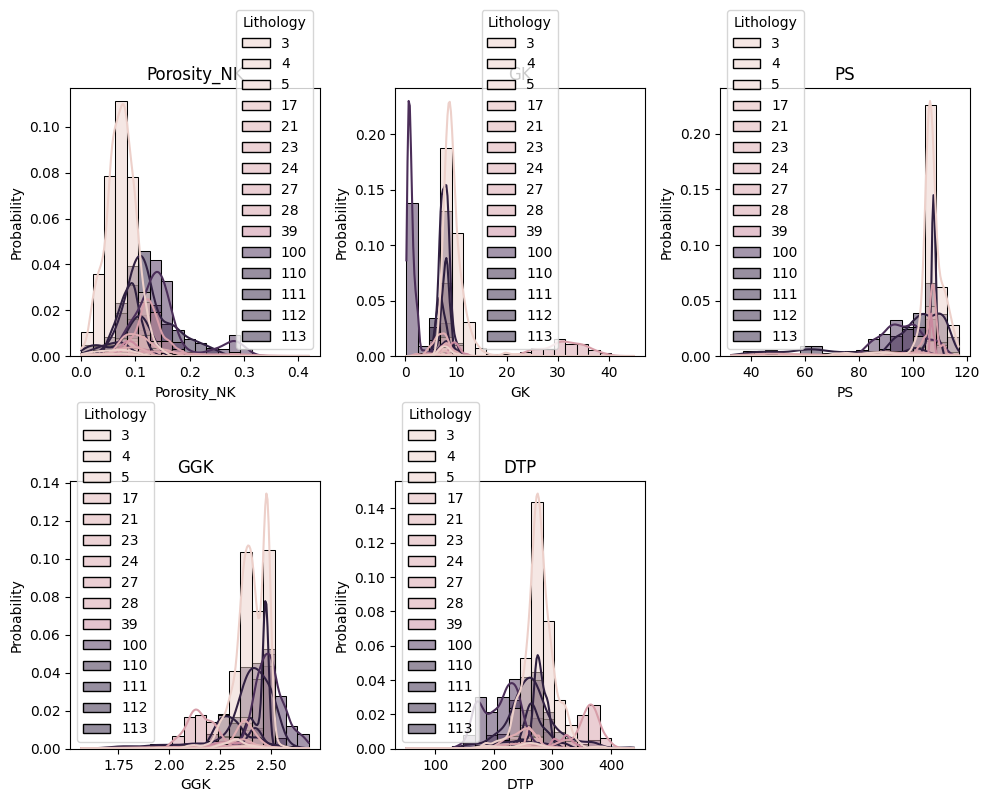

In [39]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = ['Porosity_NK', 'GK', 'PS', 'GGK',
       'DTP']

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=well_logs_merged, x=param, hue='Lithology', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [41]:
well_logs_merged.describe()

Depth_well_logs  Porosity_NK    Lithology           GK           PS  \
count      3981.000000  3980.000000  3981.000000  3981.000000  3981.000000   
mean       2369.000000     0.101831    57.611655     8.874063   100.344214   
std         114.936004     0.049301    49.450680     6.732489    14.128352   
min        2170.000000     0.000000     3.000000     0.245000    32.789000   
25%        2269.500000     0.071487     4.000000     6.860000    97.258000   
50%        2369.000000     0.095441    28.000000     8.110000   105.785000   
75%        2468.500000     0.123199   111.000000     9.230000   107.810000   
max        2568.000000     0.420084   113.000000    44.810000   117.071000   

               GGK          DTP  
count  3981.000000  3981.000000  
mean      2.384064   267.011282  
std       0.129216    45.902395  
min       1.569000    50.620000  
25%       2.342000   242.190000  
50%       2.407000   269.283000  
75%       2.473440   287.990000  
max       2.682000   438.690000

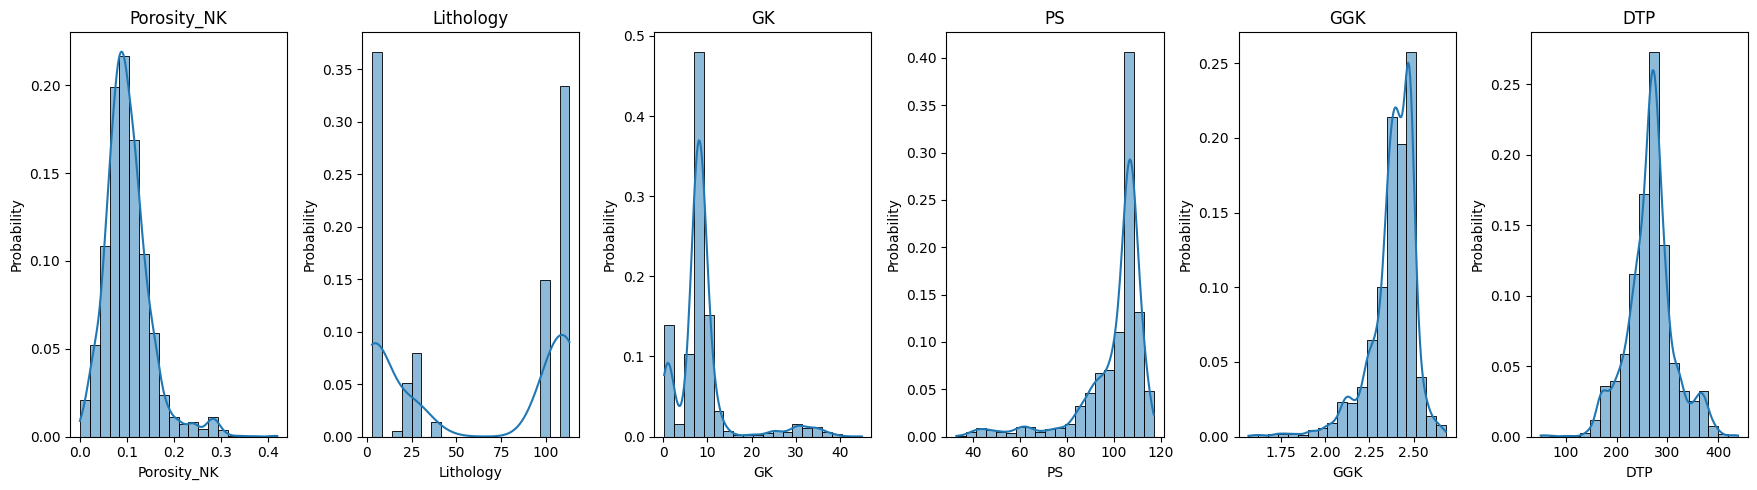

In [64]:
fig = plt.figure(figsize=(20, 5))

parameters_list = ['Porosity_NK', 'GK', 'PS', 'GGK',
       'DTP']


# Calculate appropriate subplot grid size
parameters_list = [col_name for col_name in well_logs_merged.columns if 'Depth_well_logs' not in col_name]
rows = 1
cols = (len(parameters_list) + 1) // rows

for index, name_log in enumerate(well_logs_merged.columns):

   if name_log != "Depth_well_logs":

    ax = plt.subplot(rows, cols, index + 1)

    if name_log  == "КС":
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20, log_scale=(True, False))
      plt.title(f'{name_log}')
      ax.set_xlim(100, 10000)
    else:
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20)
      plt.title(f'{name_log}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [20]:
well_logs_merged.head()

Depth_well_logs  Porosity_NK  Lithology     GK       PS   IK  GGK      DTP
0           2150.0     0.084665          4  8.055  104.639  0.0  0.0  252.617
1           2150.1     0.084776          4  8.210  104.616  0.0  0.0  251.984
2           2150.2     0.068181          4  8.685  104.774  0.0  0.0  251.352
3           2150.3     0.042652          4  9.160  105.090  0.0  0.0  251.468
4           2150.4     0.031682          4  9.560  105.289  0.0  0.0  251.583

In [148]:
thermal_logs

Sample ID  Depth_TC   Target  TC_perp_sat
0        509   2319.78  2.51840     2.287343
1        531   2322.57  2.49030     2.214457
2        537   2323.23  2.48200     2.117215
3        545   2323.99  3.37875     2.564754
4        549   2324.57  2.58210     2.361715
..       ...       ...      ...          ...
71       0_7   2505.95  3.36280     3.265832
72       474   2506.69  2.90850     2.196931
73       480   2507.45  3.36100     2.993490
74       490   2508.46  3.11720     2.624205
75       506   2510.13  2.57200     1.586353

[76 rows x 4 columns]

In [149]:
thermal_logs['Depth_TC'] = thermal_logs['Depth_TC'].round(1)
thermal_logs

Sample ID  Depth_TC   Target  TC_perp_sat
0        509    2319.8  2.51840     2.287343
1        531    2322.6  2.49030     2.214457
2        537    2323.2  2.48200     2.117215
3        545    2324.0  3.37875     2.564754
4        549    2324.6  2.58210     2.361715
..       ...       ...      ...          ...
71       0_7    2506.0  3.36280     3.265832
72       474    2506.7  2.90850     2.196931
73       480    2507.4  3.36100     2.993490
74       490    2508.5  3.11720     2.624205
75       506    2510.1  2.57200     1.586353

[76 rows x 4 columns]

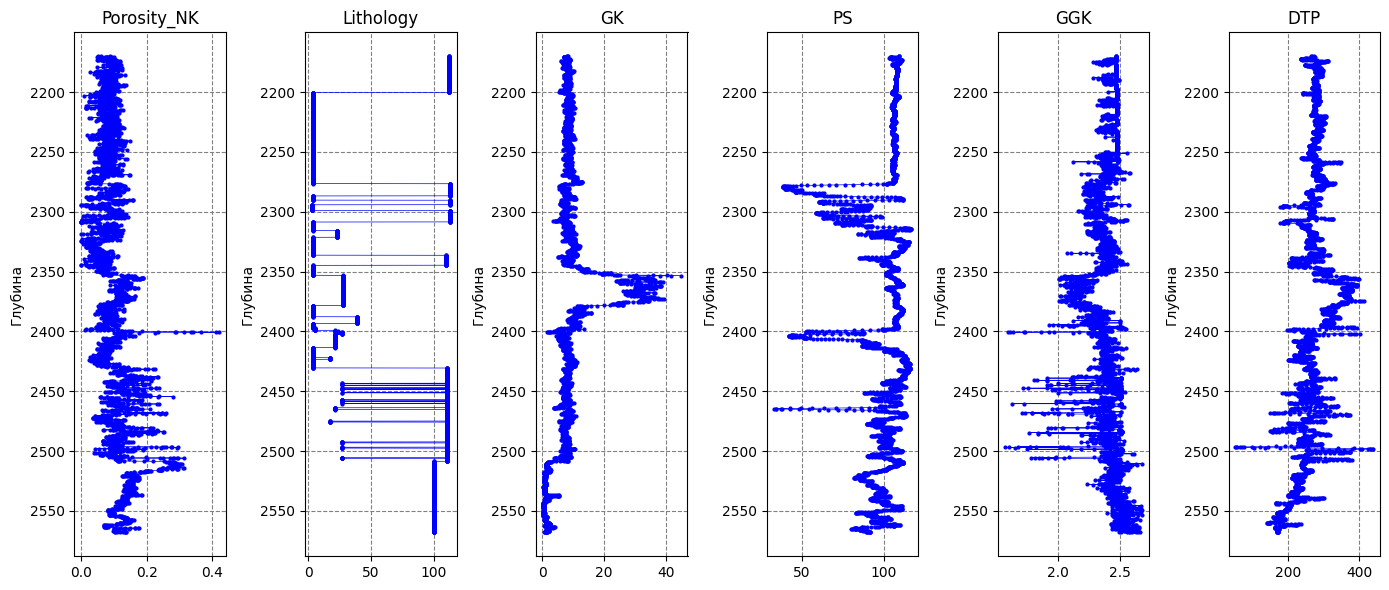

In [150]:
def initial_plot(ax, x, y, label_name):

    ax.plot(x, y, 'b-', marker='o',
            markersize=2,
            label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    # ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    if x.name == "IK":
        ax.set_xscale('log')
        ax.set_xlim(10**-4, 10000)

parameters_list = [col_name for col_name in well_logs_merged.columns if 'Depth_well_logs' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Depth_well_logs":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        # ax.set_ylim(0, 180)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Depth_well_logs'], name_log)

plt.tight_layout()
plt.show()

In [151]:
thermal_logs.rename(columns={'Depth_TC': 'Depth'}, inplace=True)
well_logs_merged.rename(columns={'Depth_well_logs': 'Depth'}, inplace=True)

In [152]:
# merged_table = pd.merge(thermal_logs, well_logs_merged, left_on='Depth_TC', right_on='Depth_well_logs', how='outer')
merged_table_new = pd.merge(thermal_logs, well_logs_merged, on="Depth", how='inner')

In [153]:
merged_table_new

Sample ID   Depth   Target  TC_perp_sat  Porosity_NK  Lithology       GK  \
0        509  2319.8  2.51840     2.287343     0.106778         23   8.1550   
1        531  2322.6  2.49030     2.214457     0.037371          4  10.5900   
2        537  2323.2  2.48200     2.117215     0.060017          4   8.8700   
3        545  2324.0  3.37875     2.564754     0.071969          4   7.1750   
4        549  2324.6  2.58210     2.361715     0.002146          4  10.2850   
..       ...     ...      ...          ...          ...        ...      ...   
71       0_7  2506.0  3.36280     3.265832     0.291883         27   4.6008   
72       474  2506.7  2.90850     2.196931     0.114373        111   8.1904   
73       480  2507.4  3.36100     2.993490     0.108796        111   6.3040   
74       490  2508.5  3.11720     2.624205     0.190265        111   5.7764   
75       506  2510.1  2.57200     1.586353     0.285974        100   1.6700   

         PS    GGK      DTP  
0   104.889  2.316  259.801  
1   108.308  2.381  286.130  
2   109.758  2.372  292.543  
3   109.361  2.424  252.386  
4   111.866  2.402  253.122  
..      ...    ...      ...  
71  104.372  1.872  289.470  
72  103.458  2.376  348.000  
73  109.615  2.422  365.320  
74  107.685  2.339  254.710  
75  111.405  2.443  246.495  

[76 rows x 10 columns]

In [154]:
merged_table_new.to_excel(f'merged_ntpk_logs.xlsx', index=False)

In [72]:
merged_table_new.columns

Index(['Sample ID', 'Depth', 'Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP'],
      dtype='object')

In [80]:
well_logs_merged.nunique()

Depth          3981
Porosity_NK    3969
Lithology        15
GK             1914
PS             3597
GGK            1282
DTP            3891
dtype: int64

In [78]:
merged_table_new.nunique()

Sample ID      76
Depth          74
Target         76
TC_perp_sat    76
Porosity_NK    74
Lithology       9
GK             73
PS             74
GGK            62
DTP            74
dtype: int64

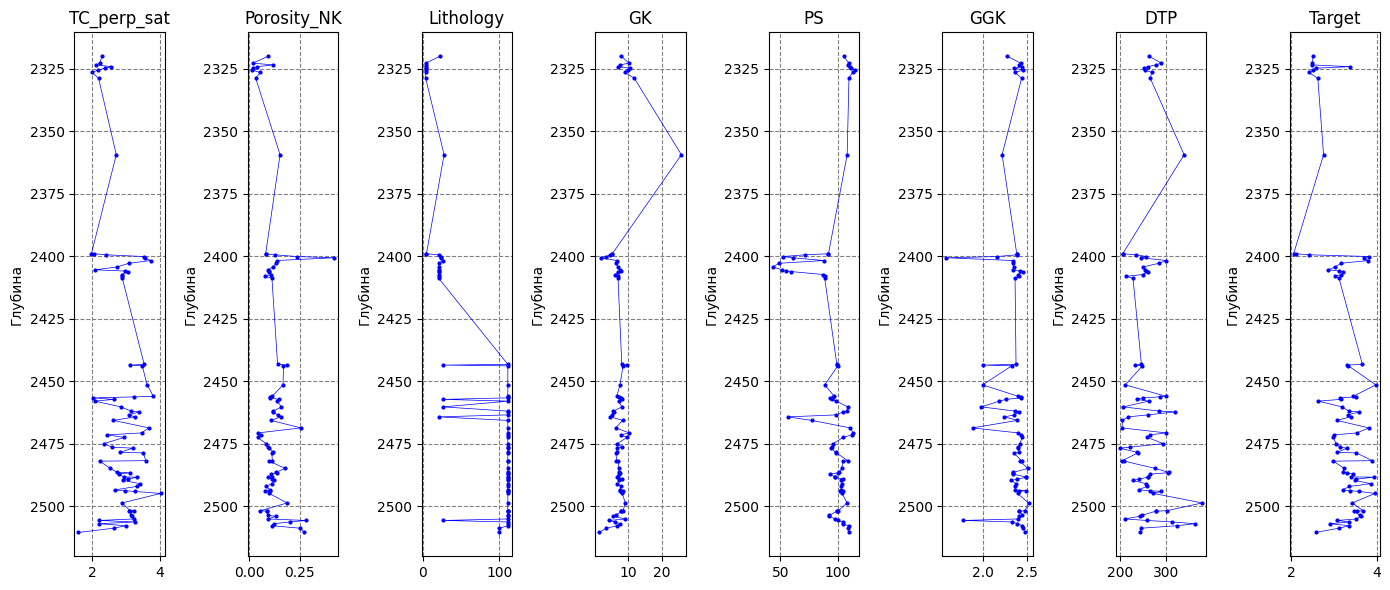

In [74]:
def initial_plot(ax, x, y, label_name):

    ax.plot(x, y, 'b-', marker='o',
            markersize=2,
            label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    # ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    if x.name == "IK":
        ax.set_xscale('log')
        ax.set_xlim(10**-4, 10000)

# parameters_list = [col_name for col_name in merged_table_new.columns if 'Depth' not in col_name]
parameters_list = ['Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(parameters_list):
    if name_log != "Depth_well_logs":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        # ax.set_ylim(0, 180)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, merged_table_new[name_log], merged_table_new['Depth'], name_log)

plt.tight_layout()
plt.show()

In [ ]:
unique_lithology_types = result_new['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартит']


In [ ]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index        lith  lith_num hatch    color
0      0      Гнейсы         0        #bebebe
1      1    Вогезиты         1        #B89230
2      2    Долериты         2        #C0FDB6
3      3  Спессартит         3        #CCCC42

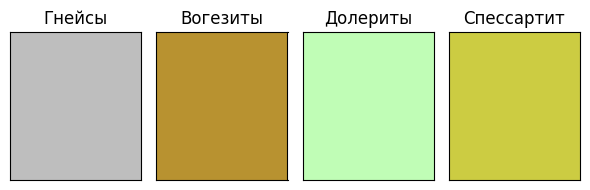

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [ ]:
lithology_array = []
hatch_array = []
color_array = []

work_layers_initial = result_new

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Литология']
    # layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

Глубина Литология    ГК       ГГпК      ПС       КС  Lithology Index  \
0        12.8    Гнейсы  17.27     37.18  3.6066   474.61          0         
1        12.9    Гнейсы  16.55  37.31333  3.6258    416.4          0         
2        13.0    Гнейсы  17.76    36.765  3.7374   452.74          0         
3        13.3    Гнейсы  20.77  37.88667  3.7362   511.12          0         
4        13.4    Гнейсы  21.58  37.17333  3.8441    443.1          0         
...       ...       ...    ...       ...     ...      ...        ...   ...   
1076    163.6    Гнейсы  22.32    32.135  4.4133  2747.14          0         
1077    163.8    Гнейсы   22.5    33.155  4.0983  2904.53          0         
1078    163.9    Гнейсы  21.41    33.695  3.9994  2989.96          0         
1079    164.0    Гнейсы  20.49  33.65333  3.8284  3060.61          0         
1080    164.1    Гнейсы   20.9  32.99333  3.6754  3224.52          0         

        Color  
0     #bebebe  
1     #bebebe  
2     #bebebe  
3     #bebebe  
4     #bebebe  
...       ...  
1076  #bebebe  
1077  #bebebe  
1078  #bebebe  
1079  #bebebe  
1080  #bebebe  

[1081 rows x 9 columns]

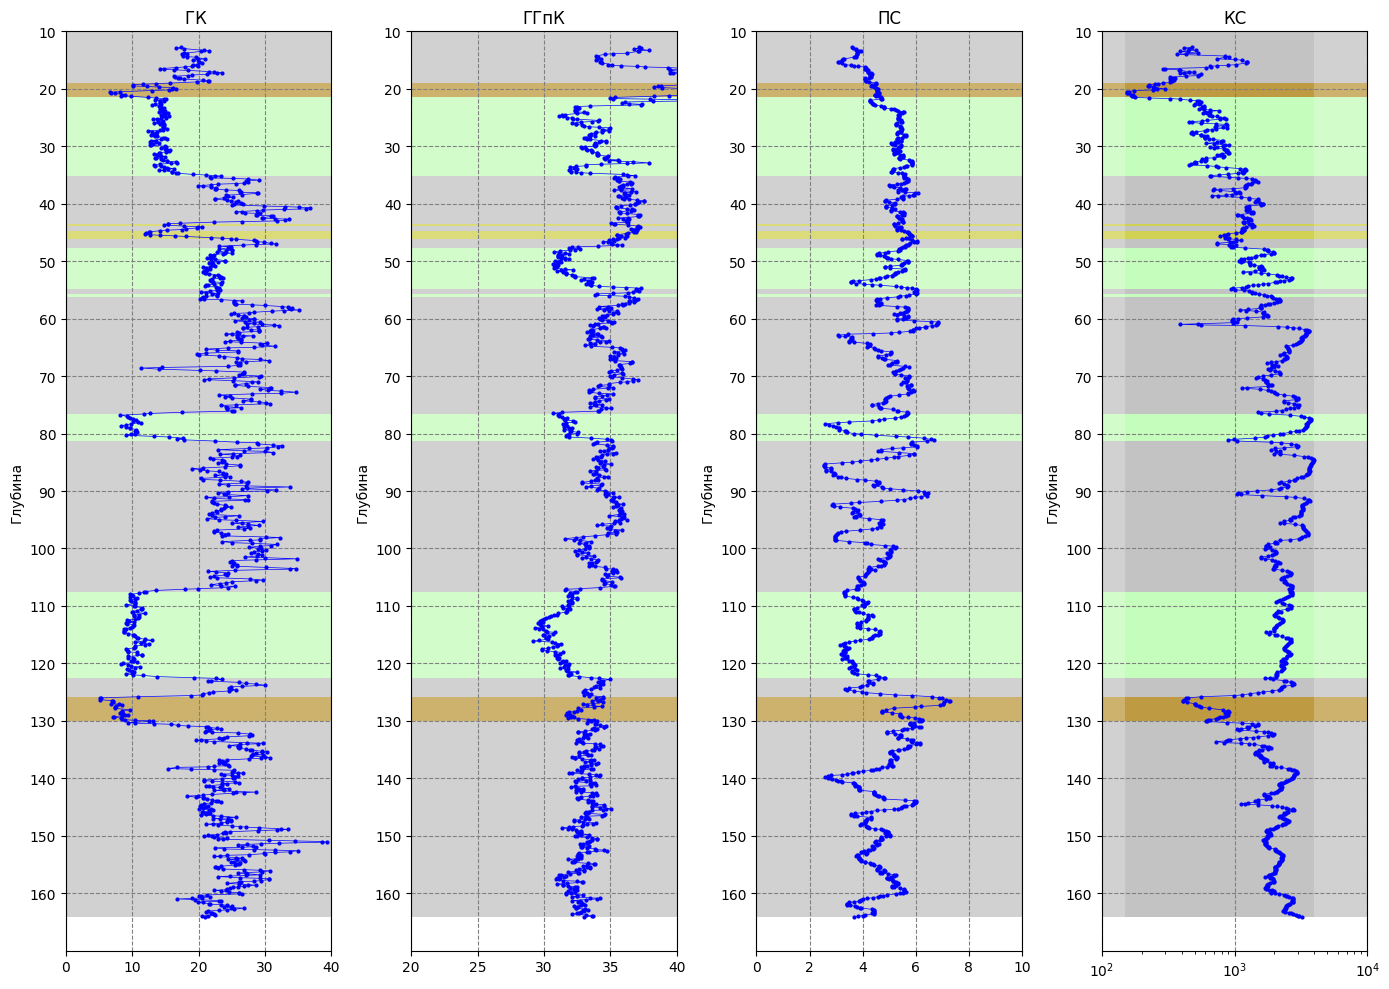

In [ ]:
def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(work_layers_initial.index,work_layers_initial['Глубина']):

      key = int(lit)
      color = work_layers_initial.at[lit, 'Color']
      hatch = work_layers_initial.at[lit, 'Index']


      depth_values = [depth_start, depth]
      depth_start = depth

      ax.fill_betweenx(depth_values,
                       (min(x) // 10) * 10, (np.round(max(x)+1, -1) // 10) * 10,
                       facecolor=color, hatch=hatch, alpha=0.7)

      if x.name == "КС":
        ax.fill_betweenx(depth_values, 100, 10000,
                       facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 10))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(10, 170)
        ax.set_yticks(np.arange(10, 170, 10))
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

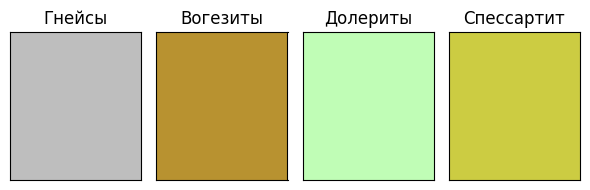

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

### Сравнение осредение ЕМ и МОЕГО

In [ ]:
thermal_logs = data[['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

KeyError: "None of [Index(['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC'], dtype='object')] are in the [index]"

In [ ]:
path_to_ser = Path(output_file)
data_EM_initial = pd.read_excel(path_to_ser, sheet_name='НТПК_ЕМ', skiprows=0)
data_EM = data_EM_initial.copy()

In [ ]:
data_EM  = data_EM.drop([0, 1])

In [ ]:
data_EM.columns

Index(['Depth of mindow (centre), m', 'Unnamed: 1', 'Window size=30 cm',
       'Unnamed: 3', 'Window size=40 cm', 'Unnamed: 5', 'Window size=50 cm',
       'Unnamed: 7', 'Window size=1  m', 'Unnamed: 9', 'TC original'],
      dtype='object')

In [ ]:
thermal_logs

Sample ID   Target Depth_TC
1           625   2.6572   30.525
2           625  2.65824   30.526
3           625   2.6208   30.527
4           625  2.64264   30.528
5           625  2.66864   30.529
...         ...      ...      ...
97775       NaN  3.17415      NaN
97776       NaN  3.30855      NaN
97777       NaN  3.34215      NaN
97778       NaN  3.10695      NaN
97779       NaN   3.3096      NaN

[97779 rows x 3 columns]

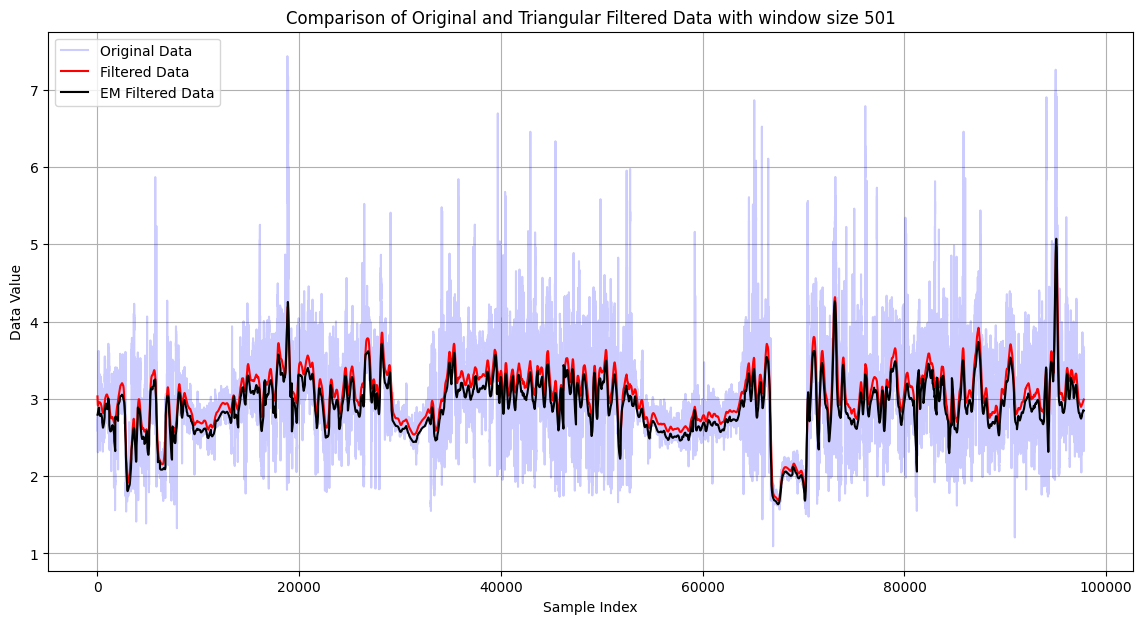

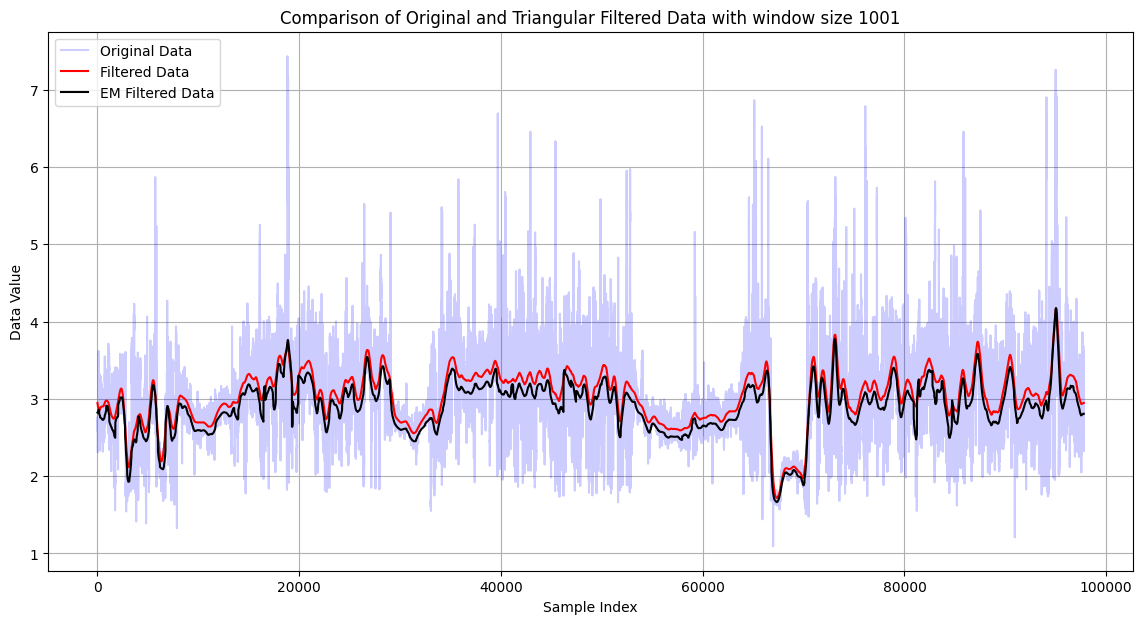

In [ ]:
def triangular_filter(data, window_size): # Осреднение в треугольном фильтре
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data


data = thermal_logs['Target']

window_size = [501, 1001]

for ws in window_size:

  filtered_data = triangular_filter(data, ws)

  # Plotting the results
  plt.figure(figsize=(14, 7))
  plt.plot(data, label='Original Data', color='blue', alpha=0.2)
  plt.plot(filtered_data, label='Filtered Data', color='red')
  if ws == 501:
    plt.plot(data_EM['Window size=50 cm'], label='EM Filtered Data', color='black')
  else:
    plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

  plt.title(f'Comparison of Original and Triangular Filtered Data with window size {ws}')
  plt.xlabel('Sample Index')
  plt.ylabel('Data Value')
  plt.legend()
  plt.grid(True)
  plt.show()

### Новая обработка (по Чехонину)

In [ ]:
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')

# path_to_ser = Path(output_file)
# data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
# data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # объединение данных ГИС с единой привязкой по глубине
# well_logs_merged

In [ ]:
thermal_logs

Sample ID   Target Depth_TC
1           625   2.6572   30.525
2           625  2.65824   30.526
3           625   2.6208   30.527
4           625  2.64264   30.528
5           625  2.66864   30.529
...         ...      ...      ...
97775       NaN  3.17415      NaN
97776       NaN  3.30855      NaN
97777       NaN  3.34215      NaN
97778       NaN  3.10695      NaN
97779       NaN   3.3096      NaN

[97779 rows x 3 columns]

In [ ]:
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)

In [ ]:
# отфильтровать значения, которые не совпадают с ГИС (интревал 36,525 -164,978)
# lower_bound, upper_bound, step = 36.525, 164.978, 0.001
lower_bound, upper_bound, step = 30.0, 165, 0.001
thermal_logs_filtered = filter_numeric_range(thermal_logs, 'Depth_TC',
                                    lower_bound, upper_bound, step)
print(lower_bound, upper_bound)
thermal_logs_filtered

30.0 165


Sample ID    Target  Depth_TC  Глубина
0           625  2.236227    30.525   30.525
1           625  2.271054    30.526   30.526
2           625  2.270586    30.527   30.527
3           625  2.213253    30.528   30.528
4           625  2.209151    30.529   30.529
...         ...       ...       ...      ...
97750         1  2.527598   164.974  164.974
97751         1   2.48806   164.975  164.975
97752         1  2.471108   164.976  164.976
97753         1  2.651218   164.977  164.977
97754         1  2.533525   164.978  164.978

[97755 rows x 4 columns]

In [ ]:
thermal_logs_filtered.groupby('Sample ID')['Depth_TC'].agg(['min', 'max', 'mean', 'count', 'median'])

min      max      mean  count    median
Sample ID                                             
1.0        164.805  164.978  164.8915    174  164.8915
2.0        164.665  164.776  164.7205    112  164.7205
3.0        164.525  164.646  164.5855    122  164.5855
4.0        164.105  164.501  164.3030    397  164.3030
5.0        163.965  164.093  164.0290    129  164.0290
...            ...      ...       ...    ...       ...
642.0       37.015   37.103   37.0590     89   37.0590
643.0       36.815   36.975   36.8950    161   36.8950
644.0       36.715   36.801   36.7580     87   36.7580
645.0       36.455   36.661   36.5580    207   36.5580
646.0       36.305   36.391   36.3480     87   36.3480

[655 rows x 5 columns]

### Oсредненнение данных ТС/VHC в треугольном фильтре

Данные по ТС усредненны в треугольном фильтре перед выборкой по образцам

In [ ]:
def triangular_filter(data, window_size):
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data

In [ ]:
data = thermal_logs_filtered['Target']
filtered_tc_triangle = triangular_filter(data, 501)

In [ ]:
data_tc_filtered = pd.DataFrame(thermal_logs_filtered["Depth_TC"])
data_tc_filtered['Sample ID'] = thermal_logs_filtered['Sample ID']
data_tc_filtered['TC filt tri'] = filtered_tc_triangle

In [ ]:
data_tc_filtered

Depth_TC Sample ID TC filt tri
0        30.525       625    2.228782
1        30.526       625    2.225516
2        30.527       625    2.222364
3        30.528       625    2.219296
4        30.529       625    2.216514
...         ...       ...         ...
97750   164.974         1    2.411591
97751   164.975         1    2.412042
97752   164.976         1    2.412489
97753   164.977         1    2.412935
97754   164.978         1    2.413373

[97755 rows x 3 columns]

NameError: name 'data_EM' is not defined

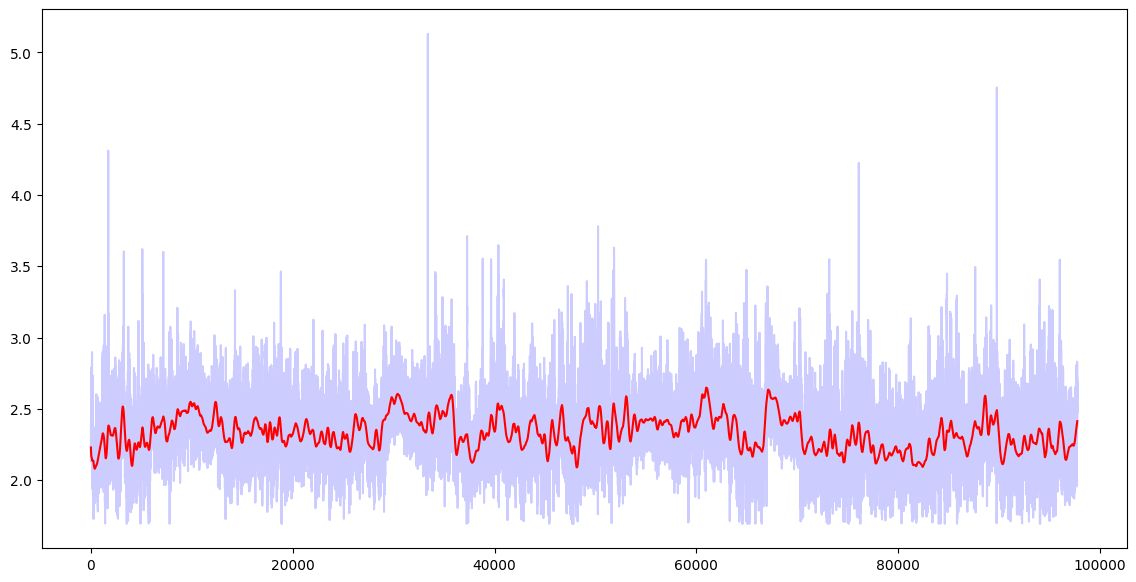

In [ ]:
 # Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', color='blue', alpha=0.2)
plt.plot(data_tc_filtered['TC filt tri'], label='Filtered Data', color='red')
plt.plot(data_EM['Window size=50 cm'], label='EM Filtered Data', color='black')
# plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

# plt.title(f'Comparison of Original and Triangular Filtered Data with window size {ws}')
plt.xlabel('Sample Index')
plt.ylabel('Data Value')
plt.legend()
plt.grid(True)
plt.show()

Привязка усредненого ТС к образцам (выбор одного значения ТС для образца)

In [ ]:
data_set_new_filtered = data_tc_filtered.groupby('Sample ID').agg({
    'TC filt tri': 'mean',
    'Depth_TC': 'median'
}).reset_index()

# Rename the columns for clarity
data_set_new_filtered.columns = ['Sample ID', 'Average Target', 'Median Depth TC']

data_set_new_filtered ['Median Depth TC'] = data_set_new_filtered ['Median Depth TC'].astype(float)
data_set_new_filtered ['Median Depth TC'] = np.round(data_set_new_filtered ['Median Depth TC'], 3)

data_set_new_filtered_by_depth = data_set_new_filtered.sort_values('Median Depth TC')

data_set_new_filtered

Sample ID Average Target  Median Depth TC
0          1.0       2.365272          164.892
1          2.0       2.280669          164.721
2          3.0        2.24522          164.586
3          4.0       2.241732          164.303
4          5.0       2.216061          164.029
..         ...            ...              ...
650      642.0        2.16625           37.059
651      643.0       2.121627           36.895
652      644.0       2.098957           36.758
653      645.0       2.093156           36.558
654      646.0       2.135051           36.348

[655 rows x 3 columns]

In [ ]:
data_set_new_filtered_by_depth[(data_set_new_filtered_by_depth['Median Depth TC'] > 109) & \
                               (data_set_new_filtered_by_depth['Median Depth TC'] < 110)]

Sample ID Average Target  Median Depth TC
420      414.0       2.423966          109.032
419      413.0       2.415482          109.175
418      412.0        2.40385          109.288
417      411.0       2.403608          109.421
416      410.0       2.408832          109.534
415      409.0       2.423129          109.656

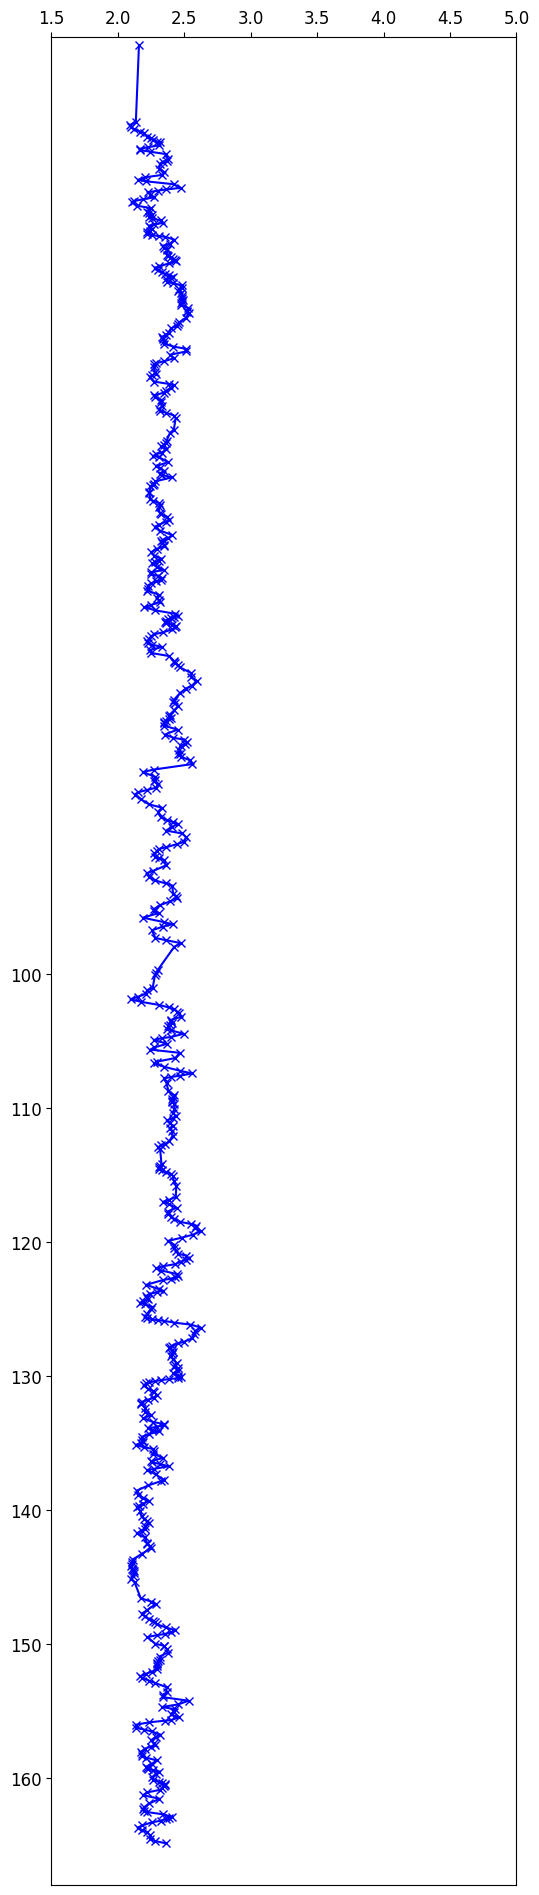

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 24))

# x, y = data_set_new['Average Target'], data_set_new['Median Depth TC']
# ax1.scatter(x, y, label='Not Filter before', marker='o', s=1, color='red')  # Use 's' instead of 'markersize'

x, y = data_set_new_filtered_by_depth['Average Target'], data_set_new_filtered_by_depth['Median Depth TC']
ax1.plot(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'
# ax1.scatter(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'


# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
ax1.set_ylim(30, 168)
ax1.set_yticks(np.arange(100, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

### Добавление ГИС к НТПК

In [45]:
well_logs_merged.describe()

Depth_well_logs  Porosity_NK    Lithology           GK           PS  \
count      3981.000000  3980.000000  3981.000000  3981.000000  3981.000000   
mean       2369.000000     0.101831    57.611655     8.874063   100.344214   
std         114.936004     0.049301    49.450680     6.732489    14.128352   
min        2170.000000     0.000000     3.000000     0.245000    32.789000   
25%        2269.500000     0.071487     4.000000     6.860000    97.258000   
50%        2369.000000     0.095441    28.000000     8.110000   105.785000   
75%        2468.500000     0.123199   111.000000     9.230000   107.810000   
max        2568.000000     0.420084   113.000000    44.810000   117.071000   

               GGK          DTP  
count  3981.000000  3981.000000  
mean      2.384064   267.011282  
std       0.129216    45.902395  
min       1.569000    50.620000  
25%       2.342000   242.190000  
50%       2.407000   269.283000  
75%       2.473440   287.990000  
max       2.682000   438.690000

Интерполяция данных ГИС

In [44]:
from scipy.interpolate import interp1d

def interpolation(x, y, new_dataframe, new_depth):

  interp_function = interp1d(x, y,
                            kind='linear',
                            bounds_error=False,
                             fill_value="extrapolate")

  # Interpolate the data to new depth
  interpolated_values = interp_function(new_depths)

  # Create a new DataFrame with the interpolated results
  new_dataframe[x.name] = new_depths
  new_dataframe[y.name] = interpolated_values

  return new_dataframe

Данным НТПК интревал 36,525 -164,978 (нобучение)

In [ ]:
# well_logs_merged - объединенные данные ГИС с единой привязкой по глубине

interpolated_df = pd.DataFrame()
new_dataframe = interpolated_df

# new_depths = np.arange(36.525, 164.979, 0.001)
new_depths = np.arange(2170, 2568, 0.001)

interpolation(well_logs_merged['Depth_well_logs'], well_logs_merged['ГК '], new_dataframe, new_depths) # ГК
interpolation(well_logs_merged['Depth_well_logs'], well_logs_merged['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(well_logs_merged['Depth_well_logs'], well_logs_merged['ПС'], new_dataframe, new_depths) # ПС
interpolation(well_logs_merged['Depth_well_logs'], well_logs_merged['КС'], new_dataframe, new_depths) # КС
# interpolation(new_data_filtered['Depth_TC'], new_data_filtered['TC filt tri'], new_dataframe, new_depths) # НТКП

# interpolated_df.drop(['Depth_TC'], axis=1, inplace=True)
interpolated_df.rename(columns={'Глубина': 'Median Depth TC'}, inplace=True)
interpolated_df['Median Depth TC'] = interpolated_df['Median Depth TC'].astype(float)
interpolated_df['Median Depth TC'] = np.round(interpolated_df['Median Depth TC'], 3)

interpolated_df

Median Depth TC      ГК        ГГпК        ПС         КС
0                30.000  14.9500  33.846670  5.453200   814.5200
1                30.001  14.9508  33.839353  5.452851   813.7377
2                30.002  14.9516  33.832037  5.452502   812.9554
3                30.003  14.9524  33.824720  5.452153   812.1731
4                30.004  14.9532  33.817403  5.451804   811.3908
...                 ...      ...        ...       ...        ...
134995          164.995  24.5695  27.086330  2.306050  4691.5145
134996          164.996  24.5736  27.079730  2.304520  4693.1536
134997          164.997  24.5777  27.073130  2.302990  4694.7927
134998          164.998  24.5818  27.066530  2.301460  4696.4318
134999          164.999  24.5859  27.059930  2.299930  4698.0709

[135000 rows x 5 columns]

In [ ]:
data_set_new_filtered.columns

Index(['Sample ID', 'Average Target', 'Median Depth TC'], dtype='object')

merged_data - целевая информация (ГИС увязан к НТПК для каждого образца)

In [ ]:
merged_data = pd.merge(data_set_new_filtered, interpolated_df, on='Median Depth TC')
merged_data['Average Target']=merged_data['Average Target'].astype(float)

merged_data .rename(columns={'Median Depth TC':'Глубина'}, inplace=True)
merged_data .rename(columns={'Average Target':'НТПК'}, inplace=True)

In [ ]:
merged_data

Sample ID      НТПК  Глубина       ГК        ГГпК        ПС         КС
0          1.0  2.365272  164.892  24.14720  27.766130  2.463640  4522.6872
1          2.0  2.280669  164.721  23.44610  28.894730  2.725270  4242.4011
2          3.0  2.245220  164.586  22.89260  29.785730  2.931820  4021.1226
3          4.0  2.241732  164.303  21.73230  31.653530  3.364810  3557.2573
4          5.0  2.216061  164.029  20.60890  33.461930  3.784030  3108.1439
..         ...       ...      ...       ...        ...       ...        ...
650      642.0  2.166250   37.059  21.32800  35.704735  5.163772  1211.4057
651      643.0  2.121627   36.895  20.01825  35.934330  5.020268  1215.6040
652      644.0  2.098957   36.758  21.34030  35.961730  4.991977  1218.1796
653      645.0  2.093156   36.558  23.98820  36.390531  5.351890  1294.4002
654      646.0  2.135051   36.348  26.98780  36.578400  5.576954  1395.3368

[655 rows x 7 columns]

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  655 non-null    float64
 1   НТПК       655 non-null    float64
 2   Глубина    655 non-null    float64
 3   ГК         655 non-null    float64
 4   ГГпК       655 non-null    float64
 5   ПС         655 non-null    float64
 6   КС         655 non-null    float64
dtypes: float64(7)
memory usage: 35.9 KB


Добавление литологии

In [ ]:
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')


path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
interpolated_df_lith = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    on='Глубина',
    how='inner'
)

In [ ]:
### Проверка наличия образца 625 (первый образец! в данных)
interpolated_df_lith['Sample ID'].isin([625]).any()

True

In [ ]:
interpolated_df_lith

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.365272  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.280669  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.245220  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.241732  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  2.216061  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
650   37.059    Гнейсы      642.0  2.166250  21.32800  35.704735  5.163772   
651   36.895    Гнейсы      643.0  2.121627  20.01825  35.934330  5.020268   
652   36.758    Гнейсы      644.0  2.098957  21.34030  35.961730  4.991977   
653   36.558    Гнейсы      645.0  2.093156  23.98820  36.390531  5.351890   
654   36.348    Гнейсы      646.0  2.135051  26.98780  36.578400  5.576954   

            КС  
0    4522.6872  
1    4242.4011  
2    4021.1226  
3    3557.2573  
4    3108.1439  
..         ...  
650  1211.4057  
651  1215.6040  
652  1218.1796  
653  1294.4002  
654  1395.3368  

[655 rows x 8 columns]

In [ ]:
# interpolated_df_lith = interpolated_df_lith[interpolated_df_lith['Sample ID'].apply(lambda x: x.is_integer())]

# # Print the modified DataFrame to verify rows are deleted
# print(interpolated_df_lith)

In [ ]:
interpolated_df_lith['Sample ID'].nunique()

655

In [ ]:
interpolated_df_lith.to_excel(f'data_to_train_{target}.xlsx', index=False)

In [ ]:
unique_lithology_types = interpolated_df_lith['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартит']


In [ ]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index        lith  lith_num hatch    color
0      0      Гнейсы         0        #bebebe
1      1    Вогезиты         1        #B89230
2      2    Долериты         2        #C0FDB6
3      3  Спессартит         3        #CCCC42

In [ ]:
# добавление литологии и цветов

lithology_array = []
hatch_array = []
color_array = []

work_layers_initial_new = interpolated_df_lith

# path_to_ser = Path('/content/output_data.xlsx')
# df = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = df.copy()

for row_index, row in enumerate(work_layers_initial_new.itertuples()):

    lithology = work_layers_initial_new.at[row.Index, 'Литология']

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)

    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial_new["Lithology"] = lithology_array
work_layers_initial_new["Index"] = hatch_array
work_layers_initial_new["Color"] = color_array
work_layers_initial_new # для построения графиков с литологией

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.365272  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.280669  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.245220  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.241732  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  2.216061  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
650   37.059    Гнейсы      642.0  2.166250  21.32800  35.704735  5.163772   
651   36.895    Гнейсы      643.0  2.121627  20.01825  35.934330  5.020268   
652   36.758    Гнейсы      644.0  2.098957  21.34030  35.961730  4.991977   
653   36.558    Гнейсы      645.0  2.093156  23.98820  36.390531  5.351890   
654   36.348    Гнейсы      646.0  2.135051  26.98780  36.578400  5.576954   

            КС  Lithology Index    Color  
0    4522.6872          0        #bebebe  
1    4242.4011          0        #bebebe  
2    4021.1226          0        #bebebe  
3    3557.2573          0        #bebebe  
4    3108.1439          0        #bebebe  
..         ...        ...   ...      ...  
650  1211.4057          0        #bebebe  
651  1215.6040          0        #bebebe  
652  1218.1796          0        #bebebe  
653  1294.4002          0        #bebebe  
654  1395.3368          0        #bebebe  

[655 rows x 11 columns]

In [ ]:
work_layers_initial_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Глубина    655 non-null    float64
 1   Литология  655 non-null    object 
 2   Sample ID  655 non-null    float64
 3   НТПК       655 non-null    float64
 4   ГК         655 non-null    float64
 5   ГГпК       655 non-null    float64
 6   ПС         655 non-null    float64
 7   КС         655 non-null    float64
 8   Lithology  655 non-null    int64  
 9   Index      655 non-null    object 
 10  Color      655 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 56.4+ KB


In [ ]:
work_layers_initial_new.to_excel('output_data_lith.xlsx', index=False)

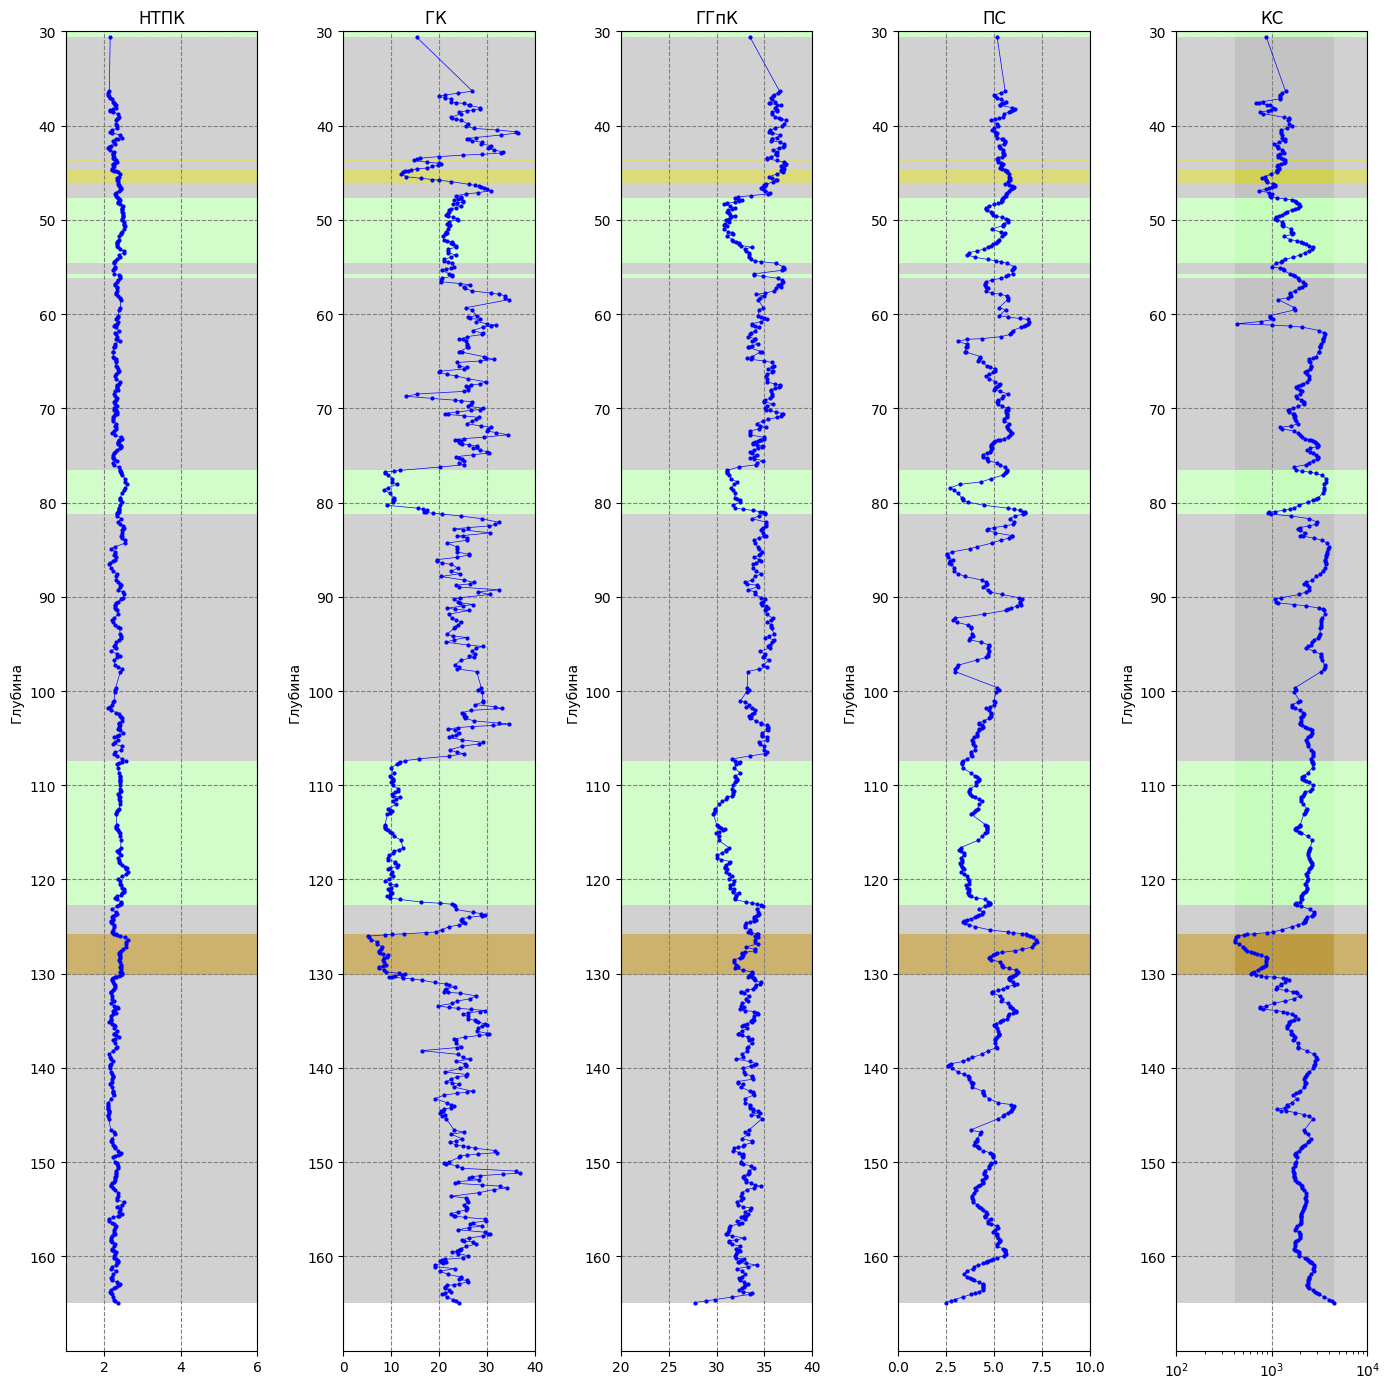

In [ ]:
data = work_layers_initial_new.sort_values('Глубина')
# data = work_layers_initial_new #0.001m

def initial_plot(ax, x, y, label_name, lithology_data):

    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "НТПК":
          ax.set_xlim(1, 6)
          ax.fill_betweenx(depth_values, 1,6,
                           facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parametrs_list = ['Average Target', 'ГК ',
       'ГГпК', 'ПС']
parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Sample ID' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]


rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 14))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(30, 170)
    ax.set_yticks(np.arange(30, 165, 10))
    ax.grid(color='gray', linestyle='--')

    initial_plot(ax, data[name_log], data['Глубина'], name_log, data['Литология'])

plt.tight_layout()
plt.show()

# Regression analysis

0.1m (привязка НТПК к ГИС)

In [ ]:
# data = work_layers_initial_new.sort_values('Глубина')
data_set = work_layers_initial_new.copy()

0.1m
Pearson correlation coefficient (R): 0.384
Pearson correlation coefficient (R): 0.246
Pearson correlation coefficient (R): 0.005
Pearson correlation coefficient (R): 0.016


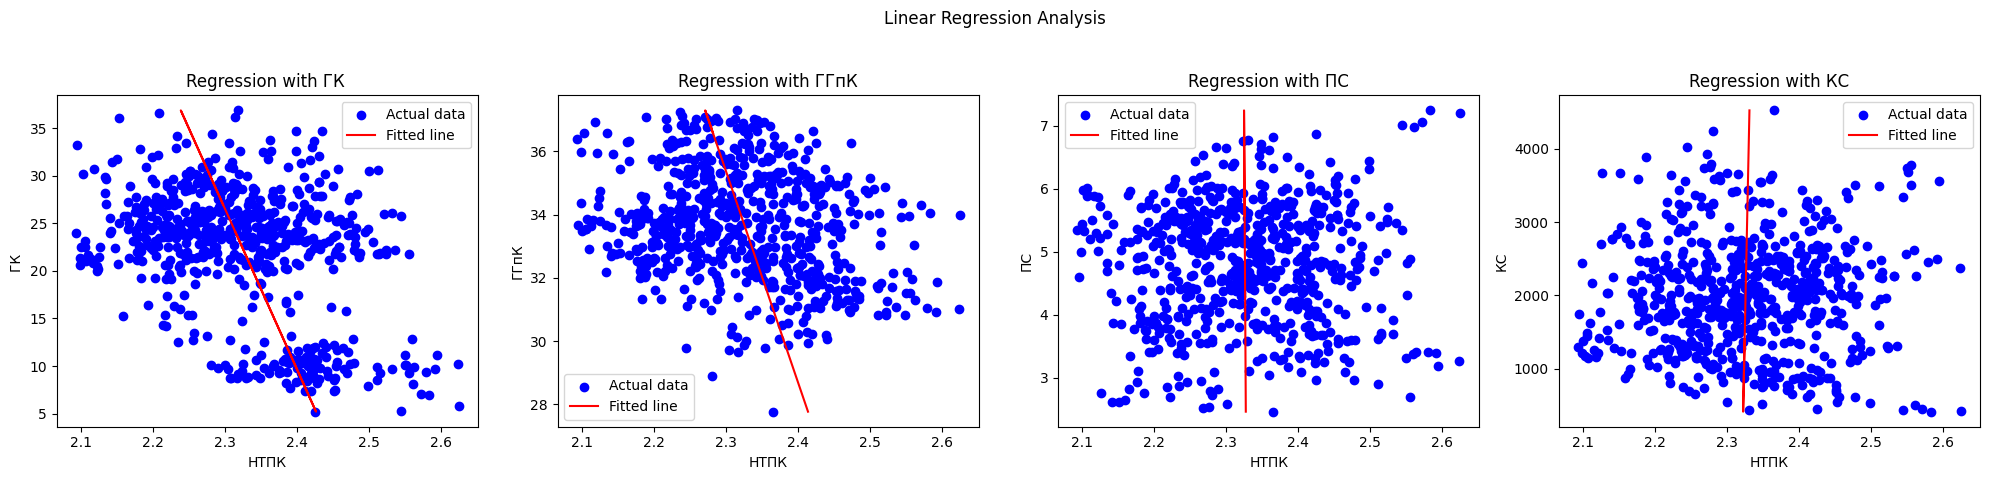

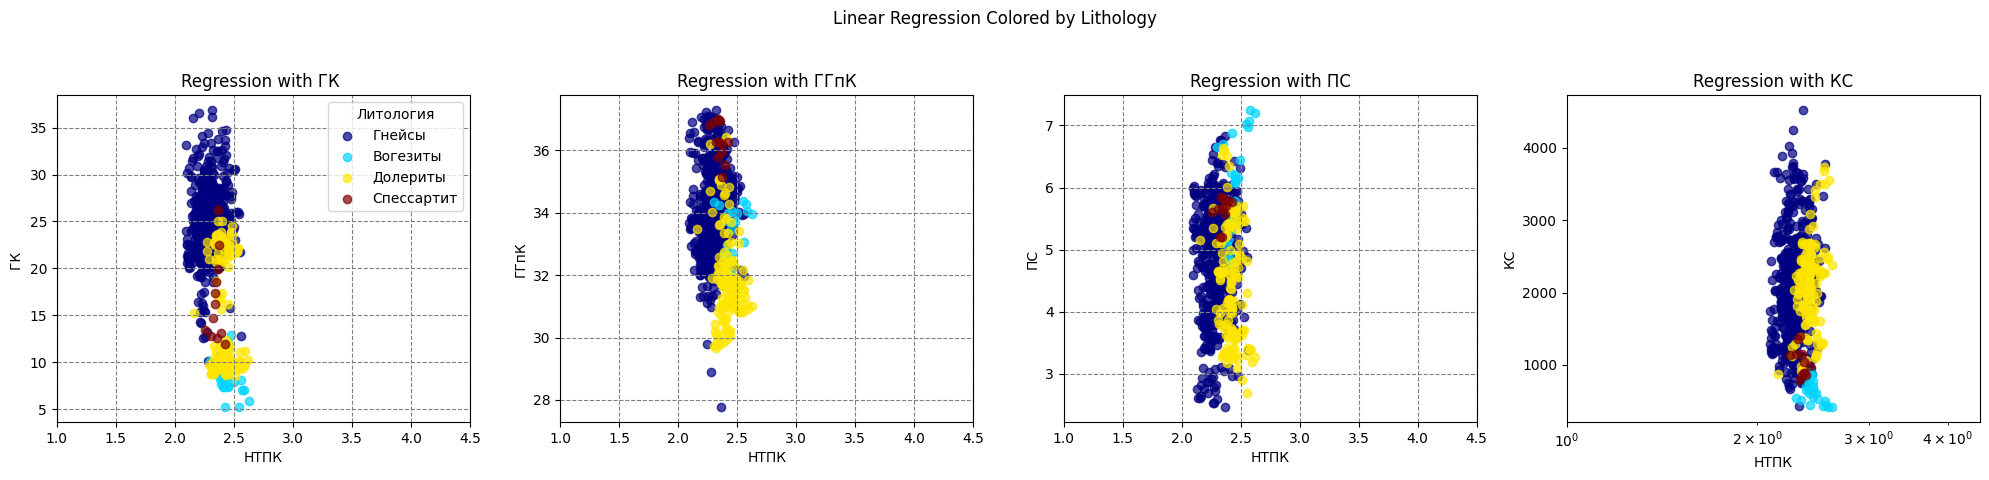

In [ ]:
from sklearn.linear_model import LinearRegression

# data_set  = work_layers_initial_new #0.001m

X_reg = data_set[['ГК ', 'ГГпК', 'ПС', 'КС']]
y_reg = data_set['НТПК']

# without lithology
model = LinearRegression()

print('0.1m')
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  # Adjust size as needed
fig.suptitle('Linear Regression Analysis')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)
    y_pred = model.predict(X_col)
    corr, _ = pearsonr(y_reg, y_pred)
    print(f'Pearson correlation coefficient (R): {corr:.3f}')

    axes[i].scatter(y_reg, X_reg[col], color='blue', label='Actual data')
    axes[i].plot(y_pred, X_reg[col], color='red', label='Fitted line')

    # axes[i].scatter(X_reg[col], y, color='blue', label='Actual data')
    # axes[i].plot(X_reg[col], y_pred, color='red', label='Fitted line')
    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# with lithology
unique_categories = data_set['Литология'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_categories)))
color_map = dict(zip(unique_categories, colors))

model = LinearRegression()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Linear Regression Colored by Lithology')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)

    y_pred = model.predict(X_col)

    point_colors = data_set['Литология'].map(color_map)

    for category in unique_categories:
        idx = data_set['Литология'] == category
        axes[i].scatter(y_reg[idx], X_reg[col][idx], color=color_map[category], label=category if i == 0 else "", alpha=0.7)

        if col == "КС":
          axes[i].set_xscale('log')
          axes[i].set_xlim(100, 10000)

        else:
          axes[i].grid(color='gray', linestyle='--')


    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].set_xlim(1, 4.5)

    if i == 0:
        axes[i].legend(title='Литология')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ML

## Data set preparation fot test - train

In [ ]:
### read data from sctreth

# path_to_ser = Path('/content/output_new.xlsx')
# data_initial = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = data_initial.copy()

In [ ]:
work_layers_initial_new

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.365272  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.280669  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.245220  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.241732  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  2.216061  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
650   37.059    Гнейсы      642.0  2.166250  21.32800  35.704735  5.163772   
651   36.895    Гнейсы      643.0  2.121627  20.01825  35.934330  5.020268   
652   36.758    Гнейсы      644.0  2.098957  21.34030  35.961730  4.991977   
653   36.558    Гнейсы      645.0  2.093156  23.98820  36.390531  5.351890   
654   36.348    Гнейсы      646.0  2.135051  26.98780  36.578400  5.576954   

            КС  Lithology Index    Color  
0    4522.6872          0        #bebebe  
1    4242.4011          0        #bebebe  
2    4021.1226          0        #bebebe  
3    3557.2573          0        #bebebe  
4    3108.1439          0        #bebebe  
..         ...        ...   ...      ...  
650  1211.4057          0        #bebebe  
651  1215.6040          0        #bebebe  
652  1218.1796          0        #bebebe  
653  1294.4002          0        #bebebe  
654  1395.3368          0        #bebebe  

[655 rows x 11 columns]

In [82]:
merged_table_new.columns

Index(['Sample ID', 'Depth', 'Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP'],
      dtype='object')

In [94]:
# dataset = data_set[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]
dataset = merged_table_new[['Depth', 'Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]
X = dataset[['Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]
y = dataset['Target']
n = len(X)

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample ID    76 non-null     object 
 1   Depth        76 non-null     float64
 2   Target       76 non-null     float64
 3   TC_perp_sat  76 non-null     float64
 4   Porosity_NK  76 non-null     float64
 5   Lithology    76 non-null     int64  
 6   GK           76 non-null     float64
 7   PS           76 non-null     float64
 8   GGK          76 non-null     float64
 9   DTP          76 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.1+ KB


### Label encoding and normalization

In [85]:
from sklearn.preprocessing import LabelEncoder

In [104]:
categorical_clmn = X.select_dtypes(include='int64').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

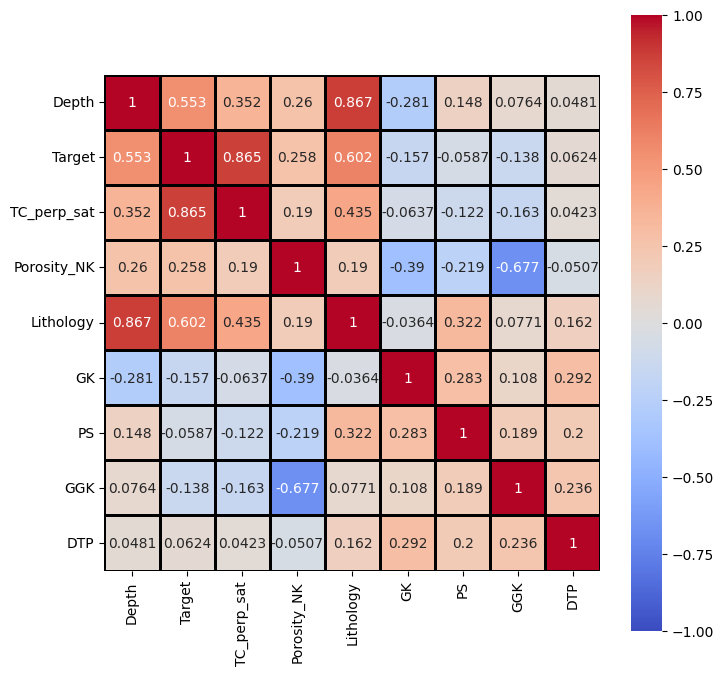

In [105]:
fig, ax = plt.subplots(figsize=(8,8))

categorical_clmn = dataset.select_dtypes(include='int64').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])


sns.heatmap(dataset.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

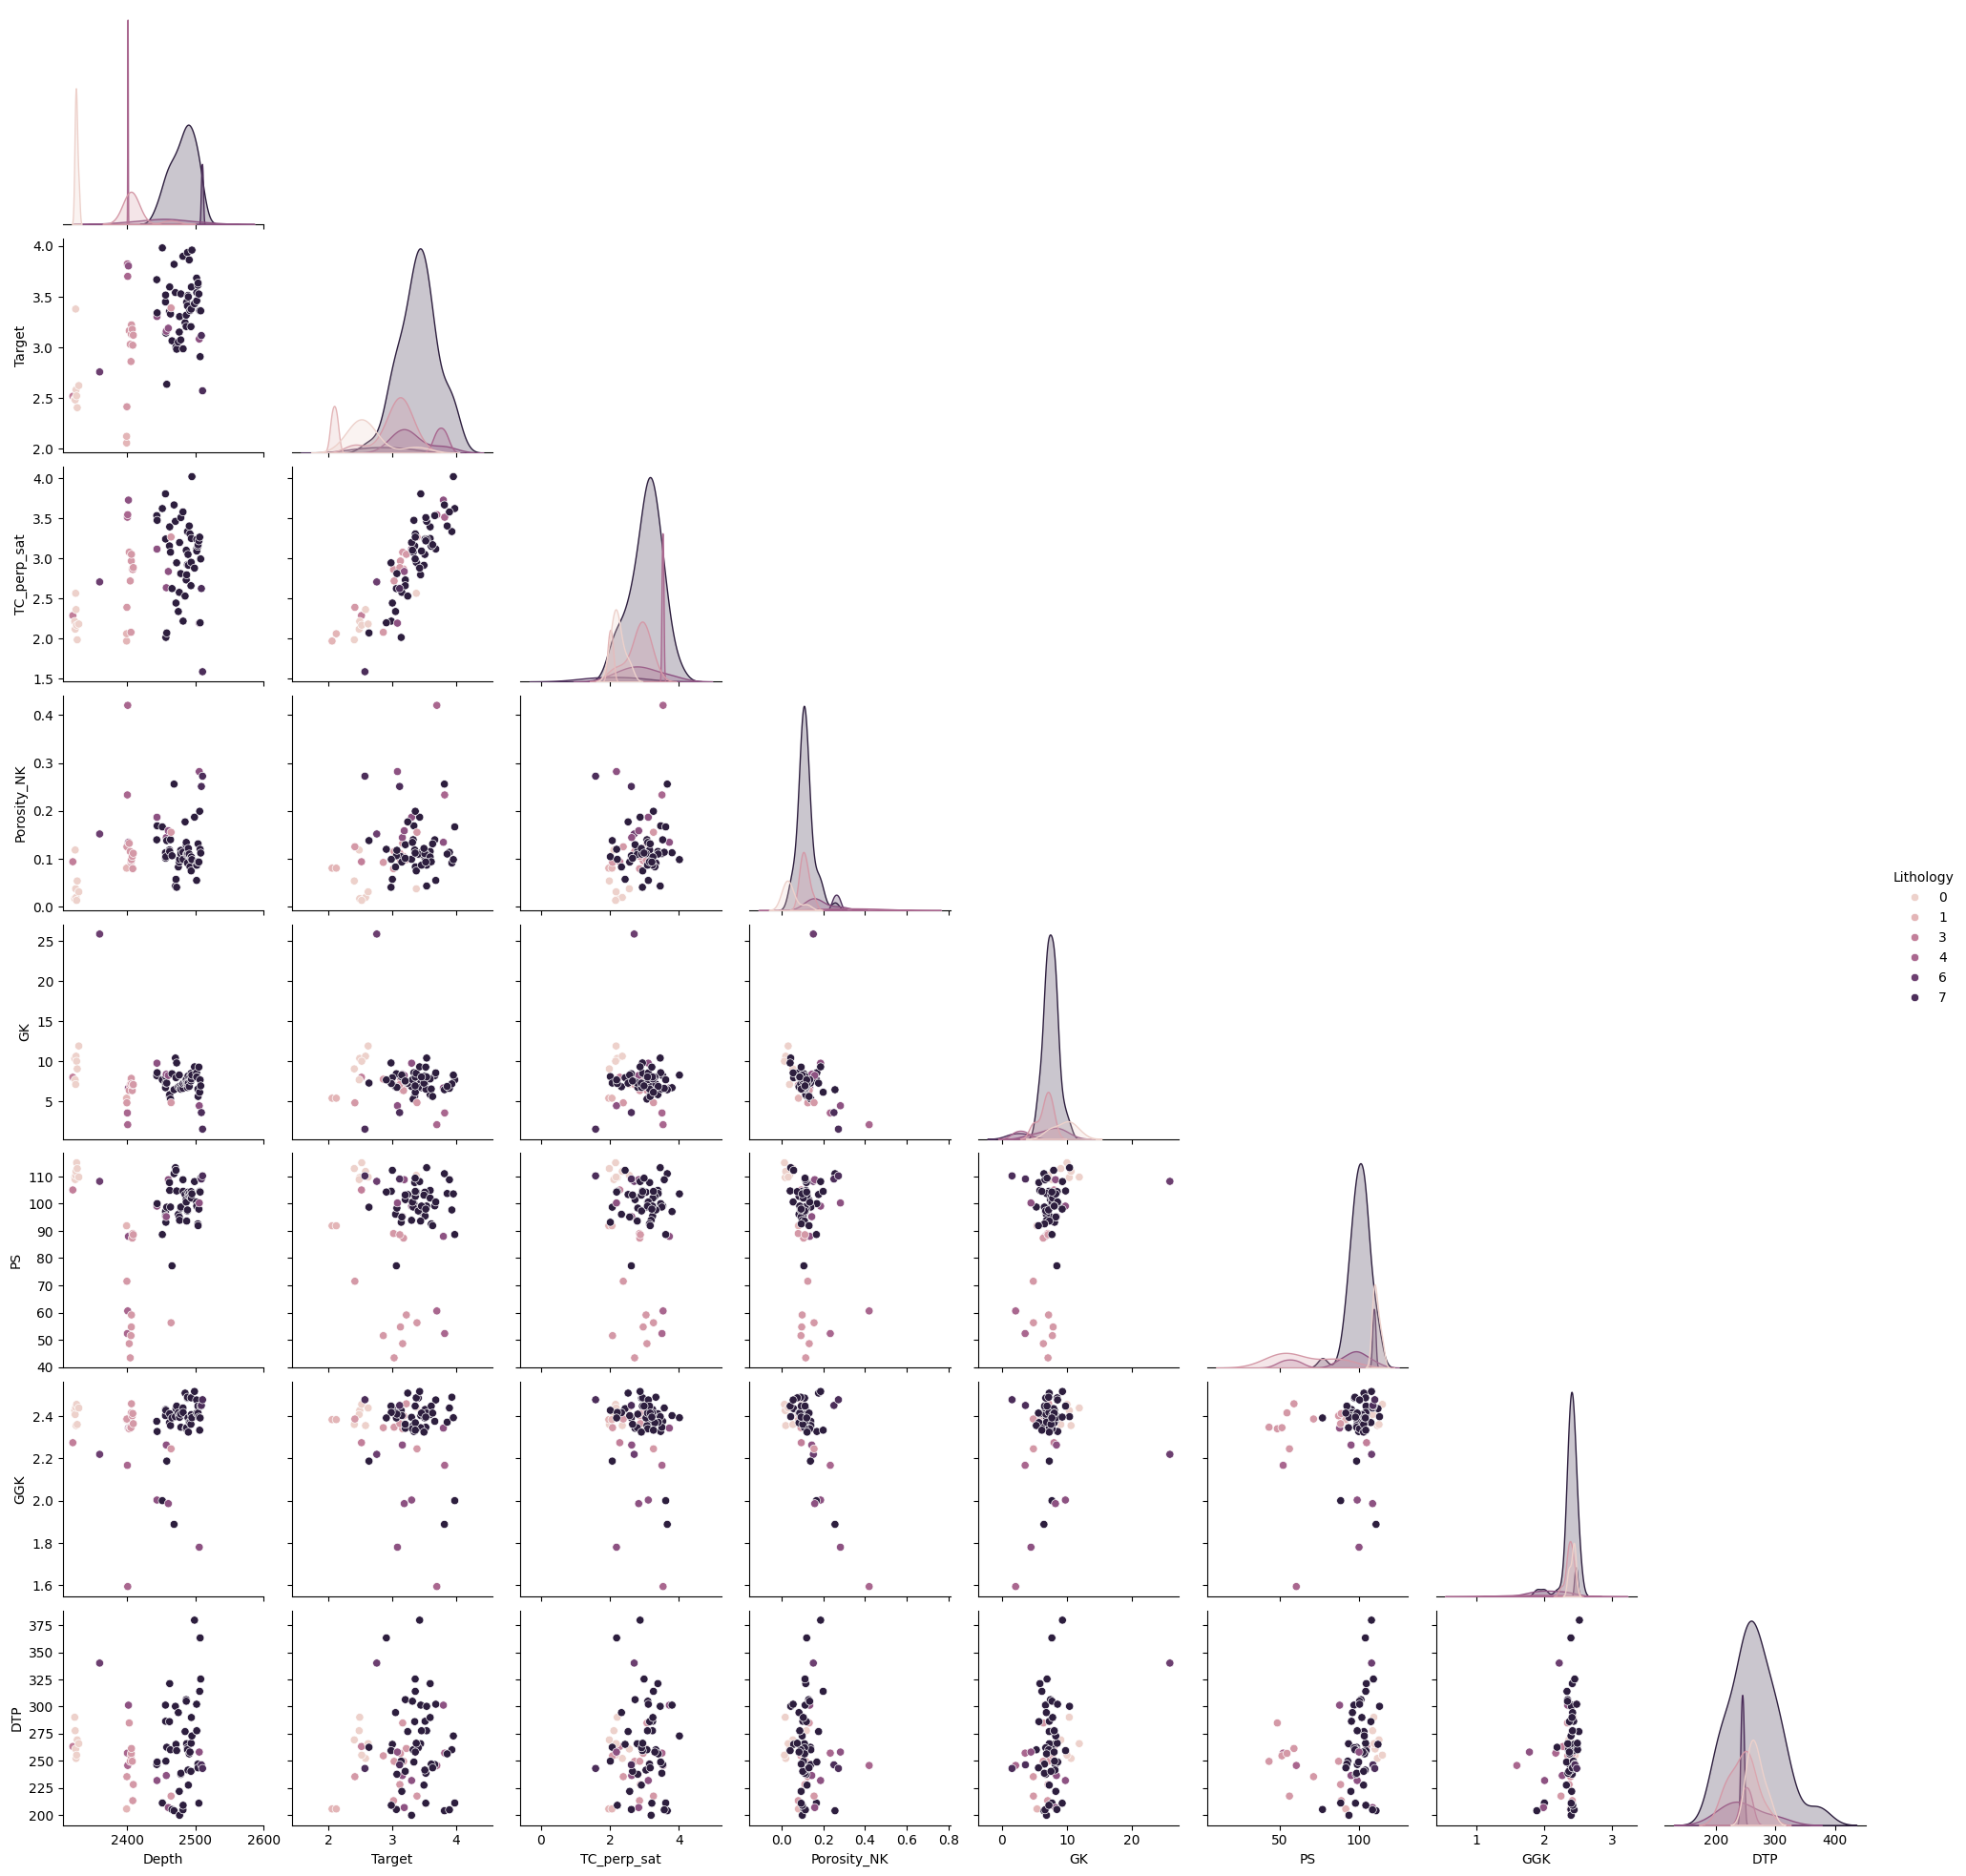

In [106]:
sns.pairplot(data=dataset,hue='Lithology', corner=True)

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns (float64 and int64 types)
numerical_columns = ['Porosity_NK', 'GK', 'PS', 'GGK', 'DTP']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(X)

    Porosity_NK  Lithology        GK        PS       GGK       DTP
0      0.198417          3  0.265962  0.860533  0.737423  0.352654
1      0.009190          0  0.362698  0.924348  0.902259  0.502345
2      0.258412          0  0.252612  0.914003  0.881654  0.433407
3      0.059674          0  0.228993  0.935600  0.918526  0.339771
4      0.015019          0  0.373788  0.955635  0.825263  0.291274
..          ...        ...       ...       ...       ...       ...
71     0.456968          8  0.189067  0.853157  0.801405  0.635136
72     0.262112          8  0.252378  0.849909  0.864303  0.909076
73     0.242885          8  0.221883  0.920932  0.925032  0.698244
74     0.584221          7  0.084876  0.916694  0.928286  0.258517
75     0.636830          7  0.000000  0.932713  0.957566  0.240093

[76 rows x 6 columns]


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.2), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.2), random_state=0xC0FFEE)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0 instead.

In [ ]:
X.shape, X_val.shape, X_test.shape, X_train.shape,

NameError: name 'X_val' is not defined

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Porosity_NK  76 non-null     float64
 1   Lithology    76 non-null     int64  
 2   GK           76 non-null     float64
 3   PS           76 non-null     float64
 4   GGK          76 non-null     float64
 5   DTP          76 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


Без валидационного датасета

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(y)*0.2), random_state=0xC0FFEE,
                                                    stratify=X['Lithology'])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(y)*0.2), random_state=0xC0FFEE)

In [110]:
X.shape, X_test.shape, X_train.shape,

((76, 6), (15, 6), (61, 6))

In [112]:
from sklearn.utils import resample

X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=len(X), random_state=0xC0FFEE)

In [113]:
X_bootstrap, y_bootstrap

(    Porosity_NK  Lithology        GK        PS       GGK       DTP
 60     0.151375          8  0.286295  0.851875  0.967326  0.369171
 66     0.180582          8  0.267441  0.777966  0.889246  0.433168
 31     0.306617          8  0.236182  0.772249  0.643076  0.348597
 59     0.215891          8  0.246862  0.834823  0.831770  0.225310
 38     0.596231          8  0.202088  0.943937  0.318827  0.023287
 ..          ...        ...       ...       ...       ...       ...
 35     0.311227          8  0.154029  0.773016  0.825263  0.335631
 43     0.196691          8  0.277258  0.721931  0.876232  0.122603
 13     1.000000          4  0.022789  0.240429  0.000000  0.255372
 37     0.228926          8  0.284036  0.471621  0.864303  0.029734
 22     0.241700          2  0.228377  0.631173  0.835023  0.157684
 
 [76 rows x 6 columns],
 60    3.3777
 66    3.4601
 31    2.6362
 59    3.2049
 38    3.8200
        ...  
 35    3.3298
 43    3.1513
 13    3.7010
 37    3.0655
 22    3.1205
 Nam

In [114]:
X_train.nunique(), X_test.nunique()

(Porosity_NK    59
 Lithology       8
 GK             58
 PS             59
 GGK            53
 DTP            59
 dtype: int64,
 Porosity_NK    15
 Lithology       4
 GK             15
 PS             15
 GGK            15
 DTP            15
 dtype: int64)

In [115]:
X_train, y_train = X_bootstrap, y_bootstrap

In [116]:
X_train.shape, y_train.shape,

((76, 6), (76,))

In [117]:
X_train.nunique(), X_test.nunique()

(Porosity_NK    44
 Lithology       8
 GK             44
 PS             44
 GGK            39
 DTP            44
 dtype: int64,
 Porosity_NK    15
 Lithology       4
 GK             15
 PS             15
 GGK            15
 DTP            15
 dtype: int64)

### Examining the feature distributions in the test - training datasets

 Examining the feature distributions in the training and test datasets to ensure they are similar is crucial for building models that generalize well. Differences in distributions can lead to models that perform well on training data but poorly on test data. Here are some methods to compare feature distributions.






*   KS Statistic:
  
    Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.

    Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity


*   P-value:
    
    Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
    
    Interpretation:
    * High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
    
    * Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.

*   Practical Application
    * **Similar Distributions:** If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
    
    * **Dissimilar Distributions:** If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.




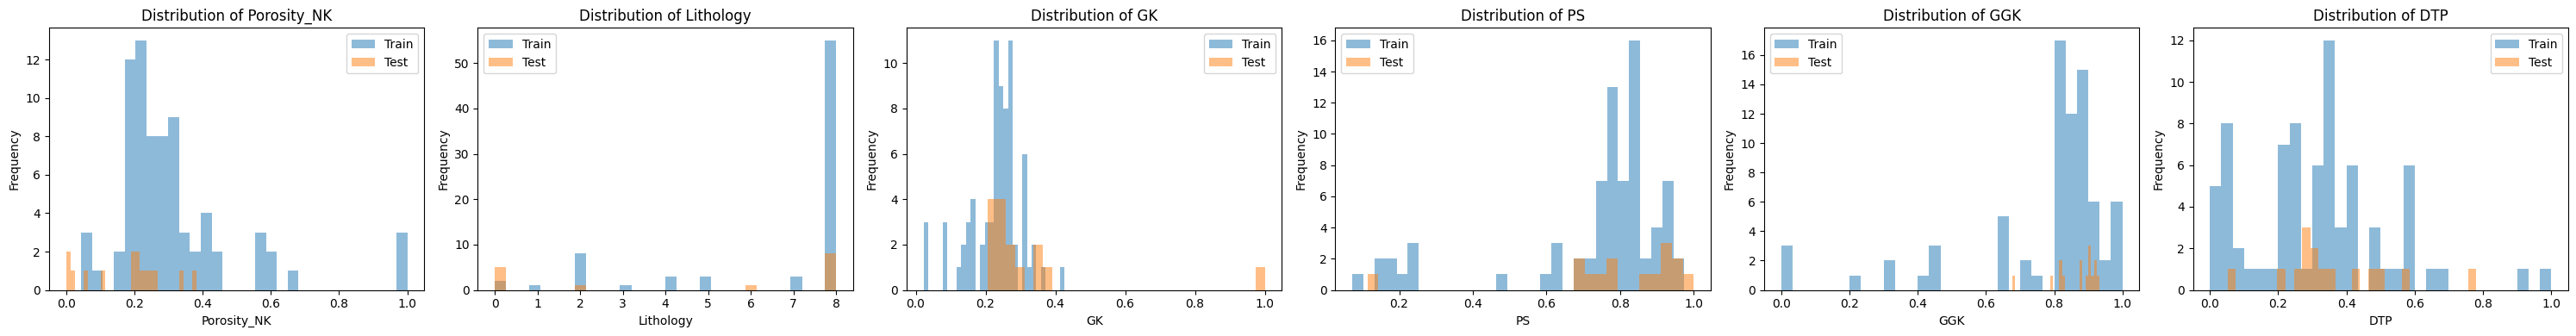

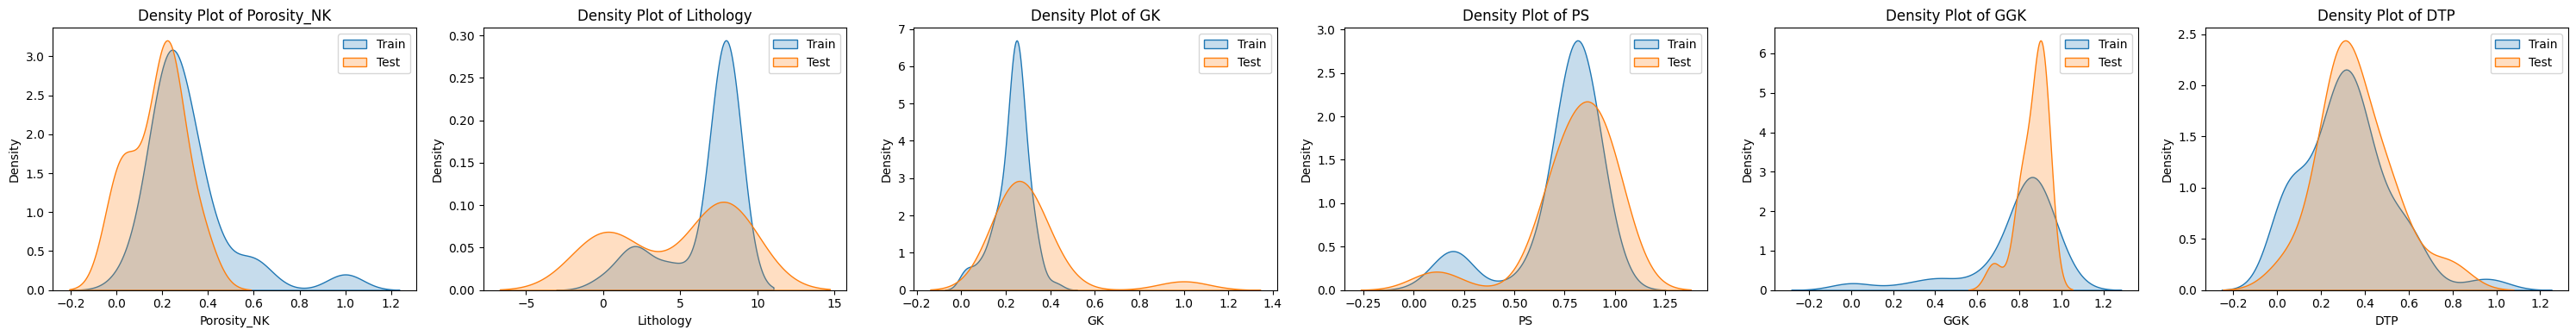

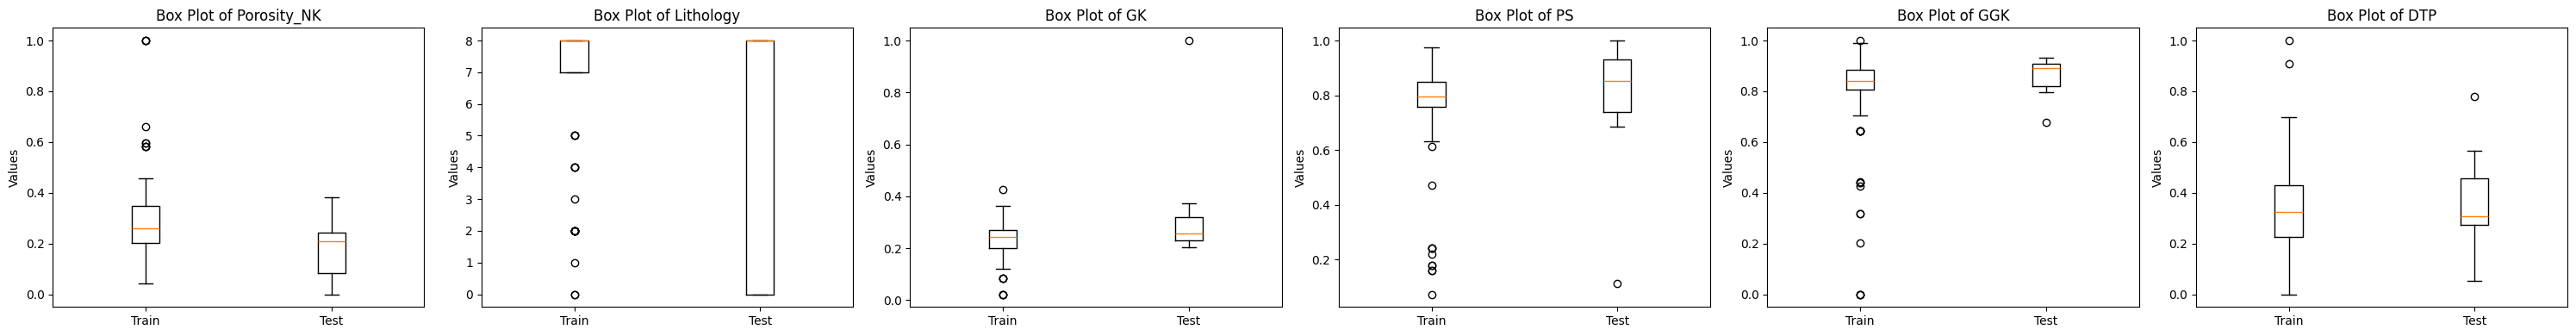

Feature: Porosity_NK, KS Statistic: 0.3930, P-value: 0.0285
Feature: Lithology, KS Statistic: 0.3070, P-value: 0.1522
Feature: GK, KS Statistic: 0.2763, P-value: 0.2332
Feature: PS, KS Statistic: 0.3360, P-value: 0.0944
Feature: GGK, KS Statistic: 0.3904, P-value: 0.0325
Feature: DTP, KS Statistic: 0.3009, P-value: 0.1613
Training Data Summary Statistics:
        Porosity_NK  Lithology         GK         PS        GGK        DTP
count    76.000000  76.000000  76.000000  76.000000  76.000000  76.000000
mean      0.311608   6.684211   0.231006   0.733113   0.771584   0.318067
std       0.187389   2.412249   0.075411   0.219027   0.226040   0.200258
min       0.044055   0.000000   0.022789   0.072893   0.000000   0.000000
25%       0.203569   7.000000   0.201164   0.756738   0.807099   0.225310
50%       0.260369   8.000000   0.243576   0.796091   0.839903   0.324126
75%       0.349353   8.000000   0.268663   0.849128   0.883552   0.429056
max       1.000000   8.000000   0.426161   0.9747

In [118]:
# Assuming X_train and X_test are your training and testing datasets respectively
features = X_train.columns

# Visual Inspection with Histograms
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].hist(X_train[feature], bins=30, alpha=0.5, label='Train')
    axes[i].hist(X_test[feature], bins=30, alpha=0.5, label='Test')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Density Plots
# Density plots can also be used to compare the distributions more smoothly than histograms.
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    sns.kdeplot(X_train[feature], ax=axes[i], label='Train', fill=True)
    sns.kdeplot(X_test[feature], ax=axes[i], label='Test', fill=True)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Box Plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].boxplot([X_train[feature], X_test[feature]], labels=['Train', 'Test'])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

# KS Statistic:
# Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.
# Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity.

# P-value:
# Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
# Interpretation:
# High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
# Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.


# Practical Application
# Similar Distributions: If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
# Dissimilar Distributions: If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.


# Statistical Tests
from scipy.stats import ks_2samp
for feature in features:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Summary Statistics
summary_train = X_train.describe()
summary_test = X_test.describe()
print("Training Data Summary Statistics:\n", summary_train)
print("\nTesting Data Summary Statistics:\n", summary_test)

Conclusion: All features show high p-values and relatively low KS statistics, suggesting that the distributions of these features in the training and testing datasets are statistically similar. This indicates good consistency and reliability for model training, as it suggests that the model's performance on the training data may generalize well to the testing data

In [119]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [120]:
!pip install xgboost

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

## Parameters grid

In [126]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined
model_name = []

    #  GaussianProcess
# Define the kernel with hyperparameters as variables
kernel = RBF(length_scale=1.0)

# Define the parameter grid for Polynomial Regression

# List of models to evaluate
models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(random_state=0xC0FFEE),  # Added Gradient Boosting
    CatBoostRegressor(silent=True, random_state=0xC0FFEE),  # Added CatBoost
    GaussianProcessRegressor(random_state=0xC0FFEE, kernel=kernel),
    AdaBoostRegressor(random_state=0xC0FFEE),
    MLPRegressor(random_state=0xC0FFEE),  # Added MLPRegressor,
    Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression())]),
    SVR()

]

# Parameter grids for each model
p_g1 = { #RandomForest
    'n_estimators': np.arange(1, 100, 30),
    'min_samples_split': np.arange(2, 51, 20),
    'min_samples_leaf': np.arange(1, 51, 20),
    'max_depth': np.arange(1,10, 2)
}

p_g2 = { #ExtraTrees
    'n_estimators': np.arange(1, 100, 30),
    'min_samples_split': np.arange(2, 51, 30),
    'min_samples_leaf': np.arange(1, 51, 30),
    'max_depth': np.arange(1, 10, 2),
    'max_features': np.arange(2, 6, 1)
}


p_g3 = {
    'n_estimators': np.arange(2, 200, 50),
    "learning_rate": np.logspace(-3, 1, 5),
    'gamma': np.arange(0, 10, 0.4),
    'max_depth': np.arange(1, 10, 2)

}

p_g4 = {  # Linear Regression has no hyperparameters to tune
}

p_g5 = {  # Ridge Regression parameters
    'alpha': np.logspace(-3, 3, 7),  # Regularization strength
}

p_g6 = {  # KNeighbors Regressor parameters
    'n_neighbors': np.arange(1, 21, 1),   # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function used in prediction
}

p_g7 = {  # Decision Tree Regressor parameters
    'max_depth': [None] + list(np.arange(1, 11)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),           # Minimum number of samples required to split an internal node
}

p_g8 = {  # Gradient Boosting parameters
    'n_estimators': np.arange(1, 100, 30),          # Number of boosting stages to be run
    'learning_rate': np.logspace(-4, 0, 10),                # Step size shrinkage used in update to prevents overfitting
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 30, 8),
    # 'min_samples_leaf': np.arange(1, 30, 8),
          # "max_features":["log2","sqrt"],

}

p_g9 = {  # CatBoost parameters (basic)
    'iterations': np.arange(50, 500, 100),              # Number of boosting iterations
    'learning_rate': np.logspace(-4, 0, 10),                     # Learning rate for boosting steps
    'depth': np.arange(2, 20, 2),                                  # Depth of the tree
    'eval_metric': ['RMSE'],
          }

p_g9 = {  # CatBoost parameters (basic)
    'iterations': np.arange(200, 1200, 400),              # Number of boosting iterations
    'learning_rate': [0.01,  0.1, 0.5],                     # Learning rate for boosting steps
    'depth': np.arange(2, 14, 4),                                  # Depth of the tree
}

p_g10 = {  # GaussianProcess
    'alpha': np.logspace(-2, 2, 4),
    'kernel__length_scale': np.logspace(-3, 3, 10)
}

p_g11 = { # AdaBoost
    'n_estimators': np.arange(1, 120, 20),  # Number of boosting stages to be run
    'learning_rate': np.logspace(-4, 0, 5),  # Step size shrinkage used in update to prevents overfitting
}

p_g12 = { # MLPRegressor
        'activation': ['relu', 'sigmoid', 'tanh'],
        'learning_rate': ['adaptive', 'constant', 'invscaling'],
        'solver': ['adam', 'sgd'],
        'alpha': np.logspace(-5, 0, 6)
    }

p_g_poly = {
    'poly__degree': [1, 2, 3, 4],  # Degrees of the polynomial
    'linear__fit_intercept': [True, False]
}

p_g_svm = ({
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
})



params_list = [p_g1, p_g2, p_g3, p_g4, p_g5, p_g6, p_g7, p_g8, p_g9, p_g10, p_g11, p_g12, p_g_poly,p_g_svm]
# params_list = [
#     # p_g1,
#     # p_g3,
#     # p_g4,
#     # p_g7,
#     # p_g8,
#     # p_g9,
#     # p_g11,
#     # p_g_poly,
#     p_g_svm
#     ]

## Test-train with validation

In [ ]:
best_trained_model = []

# Save metrics for test-train
RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []

for reg, grid in zip(models_list, params_list):

    start = time.perf_counter()

    print(f"Evaluating {type(reg).__name__}")
    print(grid)

    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)

    print(f'Training time for {type(reg).__name__}:', round((time.perf_counter() - start), 3))
    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Handle different types of models
    if isinstance(reg, GaussianProcessRegressor):
        best_length_scale = gs.best_params_['kernel__length_scale']
        kernel = RBF(length_scale=best_length_scale)
        best_reg = GaussianProcessRegressor(kernel=kernel, random_state=0xC0FFEE)
    elif isinstance(reg, Pipeline):
        # Reconfigure the pipeline with best parameters
        best_params = gs.best_params_
        steps = [(name, clf) for name, clf in reg.steps]
        for name, clf in steps:
            step_params = {param.split('__')[1]: value for param, value in best_params.items() if param.startswith(name)}
            clf.set_params(**step_params)
        best_reg = Pipeline(steps)
    else:
        # For other models, use the best parameters directly
        best_reg = reg.__class__(**gs.best_params_)

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)
    best_trained_model.append(best_reg)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Train MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    # print(best_trained_model)
    print(' ')

Evaluating RandomForestRegressor
{'n_estimators': array([ 1, 21, 41, 61, 81]), 'min_samples_split': array([ 2, 12, 22, 32, 42]), 'min_samples_leaf': array([ 1, 11, 21, 31, 41]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}
Training time for RandomForestRegressor: 393.717
RandomForestRegressor: Best Params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 81}
Cross-validated MSE: 0.06
Validation MSE: 0.02
Validation R^2: 0.71
Validation MAE: 0.12
Train MSE: 0.01
Train R^2: 0.93
Train MAE: 0.06
Test MSE: 0.03
Test R^2: 0.71
Train MAE: 0.13
 
Evaluating XGBRegressor
{'n_estimators': array([  2,  42,  82, 122, 162]), 'learning_rate': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]), 'gamma': array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. , 8.4, 8.8, 9.2, 9

In [128]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Validation RMSE': RMSE_validation,
    'Validation R^2': R2_validation,
    'Validation MAE': MAE_validation,
    'Train RMSE': RMSE_train,
    'Train R^2': R2_train,
    'Train MAE': MAE_train,
    'Test RMSE': RMSE_test,
    'Test R^2': R2_test,
    'Test MAE': MAE_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

ValueError: All arrays must be of the same length

## Test-train without validation

In [124]:
# Предположим, что gs.cv_results_ содержит результаты для CatBoost
def plot_metrics_for_param(cv_results, param_name, metric='mean_test_score'):
    param_values = cv_results['param_' + param_name]
    mean_scores = cv_results[metric]

    # Подготовка данных для графика
    unique_values = np.unique(param_values)
    mean_scores_per_value = [mean_scores[param_values == value].mean() for value in unique_values]

    plt.figure(figsize=(10, 5))
    plt.plot(unique_values, mean_scores_per_value, marker='o')
    plt.title(f'Change of {metric} with {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


In [127]:
best_trained_model = []

# Save metrics for test-train
RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []

for reg, grid in zip(models_list, params_list):
    start = time.perf_counter()

    print(f"Evaluating {type(reg).__name__}")
    print(grid)

    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5, scoring='r2')
    gs.fit(X_train, y_train)

    #     # Пример вызова функции для визуализации
    # plot_metrics_for_param(gs.cv_results_, 'iterations')
    # plot_metrics_for_param(gs.cv_results_, 'learning_rate')
    # plot_metrics_for_param(gs.cv_results_, 'depth')

    print(f'Training time for {type(reg).__name__}:', round((time.perf_counter() - start), 3))
    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Handle different types of models
    if isinstance(reg, GaussianProcessRegressor):
        best_length_scale = gs.best_params_['kernel__length_scale']
        kernel = RBF(length_scale=best_length_scale)
        best_reg = GaussianProcessRegressor(kernel=kernel, random_state=0xC0FFEE)
    elif isinstance(reg, Pipeline):
        best_params = gs.best_params_
        steps = [(name, clf) for name, clf in reg.steps]
        for name, clf in steps:
            step_params = {param.split('__')[1]: value for param, value in best_params.items() if param.startswith(name)}
            clf.set_params(**step_params)
        best_reg = Pipeline(steps)
    else:
        best_reg = reg.__class__(**gs.best_params_)

    best_reg.fit(X_train, y_train)
    best_trained_model.append(best_reg)

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])
    print(f'Cross-validated MSE: {-best_score:.2f}')

    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Test MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

Evaluating RandomForestRegressor
{'n_estimators': array([ 1, 31, 61, 91]), 'min_samples_split': array([ 2, 22, 42]), 'min_samples_leaf': array([ 1, 21, 41]), 'max_depth': array([1, 3, 5, 7, 9])}
Training time for RandomForestRegressor: 61.805
RandomForestRegressor: Best Params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 91}
Cross-validated MSE: 0.06
Train MSE: 0.01
Train R^2: 0.93
Train MAE: 0.05
Test MSE: 0.09
Test R^2: 0.43
Test MAE: 0.23
 
Evaluating ExtraTreesRegressor
{'n_estimators': array([ 1, 31, 61, 91]), 'min_samples_split': array([ 2, 32]), 'min_samples_leaf': array([ 1, 31]), 'max_depth': array([1, 3, 5, 7, 9]), 'max_features': array([2, 3, 4, 5])}
Training time for ExtraTreesRegressor: 66.113
ExtraTreesRegressor: Best Params: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 31}
Cross-validated MSE: 0.20
Train MSE: 0.01
Train R^2: 0.93
Train MAE: 0.05
Test MSE: 0.09
Test R^2: 0.45
Test MA

In [130]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Train RMSE': RMSE_train,
    'Train MAE': MAE_train,
    'Train R^2': R2_train,
    'Test RMSE': RMSE_test,
    'Test MAE': MAE_test,

    'Test R^2': R2_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

ValueError: All arrays must be of the same length

### Tuning hyperparametrs for catboost

In [ ]:
!pip install catboost optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import catboost as cb
import optuna
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 1, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 1.5, log=True),
        "depth": trial.suggest_int("depth", 1, 15),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "od_type": "Iter",
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "loss_function": "RMSE"
    }

    # Create a Pool object
    train_pool = cb.Pool(X_train, y_train)

    # Perform cross-validation
    cv_results = cb.cv(
        pool=train_pool,
        params=params,
        fold_count=5,
        type='Classical',  # Change to 'TimeSeries' if dealing with time series data
        verbose=False,
        plot=False
    )

    # Extract the best RMSE score
    best_rmse = np.min(cv_results['test-RMSE-mean'])

    # Calculate and print training metrics
    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(train_pool, verbose=False)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print('Train MSE:', round(mean_squared_error(y_train, y_pred_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    print('Test MSE:', round(mean_squared_error(y_test, y_pred_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Test MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    return best_rmse

# Assuming X_train, y_train, X_test, y_test are defined elsewhere

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-10-19 16:25:18,117] A new study created in memory with name: no-name-e72b4137-e3c9-4d5b-a5d0-0c5e9cb200ab


Training on fold [0/5]

bestTest = 0.07398349547
bestIteration = 580

Training on fold [1/5]

bestTest = 0.08487942815
bestIteration = 399

Training on fold [2/5]

bestTest = 0.07642929055
bestIteration = 489

Training on fold [3/5]

bestTest = 0.07791871466
bestIteration = 458

Training on fold [4/5]

bestTest = 0.08275209204
bestIteration = 492



[I 2024-10-19 16:25:19,147] Trial 0 finished with value: 0.07927581862886127 and parameters: {'iterations': 751, 'learning_rate': 0.14663489833263216, 'depth': 1, 'subsample': 0.08213806624021465, 'colsample_bylevel': 0.3079528369148227, 'min_data_in_leaf': 78, 'od_wait': 42}. Best is trial 0 with value: 0.07927581862886127.


Train MSE: 0.01
Train R^2: 0.47
Train MAE: 0.06
Test MSE: 0.01
Test R^2: 0.37
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.08188561961
bestIteration = 137

Training on fold [1/5]

bestTest = 0.07164679709
bestIteration = 254

Training on fold [2/5]

bestTest = 0.0696403361
bestIteration = 123

Training on fold [3/5]

bestTest = 0.08395390867
bestIteration = 120

Training on fold [4/5]

bestTest = 0.07144060096
bestIteration = 118



[I 2024-10-19 16:25:22,091] Trial 1 finished with value: 0.07591620956305903 and parameters: {'iterations': 801, 'learning_rate': 0.17007764732878083, 'depth': 5, 'subsample': 0.0570047382409853, 'colsample_bylevel': 0.9496922031773208, 'min_data_in_leaf': 100, 'od_wait': 10}. Best is trial 1 with value: 0.07591620956305903.


Train MSE: 0.0
Train R^2: 0.97
Train MAE: 0.01
Test MSE: 0.01
Test R^2: 0.46
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.2599134359
bestIteration = 54

Training on fold [1/5]

bestTest = 0.1279690943
bestIteration = 85

Training on fold [2/5]

bestTest = 0.169445755
bestIteration = 154

Training on fold [3/5]

bestTest = 0.1795528823
bestIteration = 40

Training on fold [4/5]

bestTest = 0.1804193593
bestIteration = 62



[I 2024-10-19 16:25:39,667] Trial 2 finished with value: 0.18379720304342256 and parameters: {'iterations': 351, 'learning_rate': 0.5155710801366484, 'depth': 12, 'subsample': 0.32044166306351324, 'colsample_bylevel': 0.5271329727036042, 'min_data_in_leaf': 87, 'od_wait': 14}. Best is trial 1 with value: 0.07591620956305903.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.45
Test MAE: 0.06
Training on fold [0/5]


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.3911101748
bestIteration = 24

Training on fold [1/5]

bestTest = 0.3450863841
bestIteration = 20

Training on fold [2/5]

bestTest = 0.2385470175
bestIteration = 18

Training on fold [3/5]

bestTest = 0.5617479485
bestIteration = 31

Training on fold [4/5]

bestTest = 0.1857008373
bestIteration = 48



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:25:52,237] Trial 3 finished with value: 0.3460692615699134 and parameters: {'iterations': 801, 'learning_rate': 1.4726312049053734, 'depth': 10, 'subsample': 0.43369567823114336, 'colsample_bylevel': 0.910796594029021, 'min_data_in_leaf': 38, 'od_wait': 14}. Best is trial 1 with value: 0.07591620956305903.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.3
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.2910008818
bestIteration = 19

Training on fold [1/5]

bestTest = 0.142390455
bestIteration = 35

Training on fold [2/5]


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.1169911726
bestIteration = 33

Training on fold [3/5]

bestTest = 0.1886257916
bestIteration = 13

Training on fold [4/5]

bestTest = 0.1066017203
bestIteration = 54



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:25:53,389] Trial 4 finished with value: 0.17133977146606522 and parameters: {'iterations': 801, 'learning_rate': 1.4792438549141722, 'depth': 6, 'subsample': 0.9540590276652621, 'colsample_bylevel': 0.595015334594722, 'min_data_in_leaf': 71, 'od_wait': 12}. Best is trial 1 with value: 0.07591620956305903.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.19
Test MAE: 0.08
Training on fold [0/5]

bestTest = 0.1474306173
bestIteration = 59

Training on fold [1/5]

bestTest = 0.072878336
bestIteration = 99

Training on fold [2/5]

bestTest = 0.06366956983
bestIteration = 42

Training on fold [3/5]

bestTest = 0.09171109396
bestIteration = 86

Training on fold [4/5]

bestTest = 0.06665120026
bestIteration = 115



[I 2024-10-19 16:25:55,376] Trial 5 finished with value: 0.08906360073575334 and parameters: {'iterations': 501, 'learning_rate': 0.6604074784287639, 'depth': 7, 'subsample': 0.4589748524301063, 'colsample_bylevel': 0.6826531594558032, 'min_data_in_leaf': 37, 'od_wait': 35}. Best is trial 1 with value: 0.07591620956305903.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.34
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.05727445615
bestIteration = 118

Training on fold [1/5]

bestTest = 0.06238561652
bestIteration = 100

Training on fold [2/5]

bestTest = 0.05535604497
bestIteration = 81

Training on fold [3/5]

bestTest = 0.06954624673
bestIteration = 75

Training on fold [4/5]

bestTest = 0.06361739556
bestIteration = 113



[I 2024-10-19 16:25:56,080] Trial 6 finished with value: 0.06220229071271617 and parameters: {'iterations': 401, 'learning_rate': 0.9548855156930627, 'depth': 11, 'subsample': 0.697511932168332, 'colsample_bylevel': 0.20889472457405106, 'min_data_in_leaf': 86, 'od_wait': 22}. Best is trial 6 with value: 0.06220229071271617.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.18
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.06007483561
bestIteration = 431

Training on fold [1/5]

bestTest = 0.06902048913
bestIteration = 160

Training on fold [2/5]

bestTest = 0.06843975889
bestIteration = 177

Training on fold [3/5]

bestTest = 0.1246573225
bestIteration = 27

Training on fold [4/5]

bestTest = 0.06290594016
bestIteration = 185



[I 2024-10-19 16:25:57,520] Trial 7 finished with value: 0.07754335507840668 and parameters: {'iterations': 951, 'learning_rate': 0.545710969351622, 'depth': 4, 'subsample': 0.48323658597920793, 'colsample_bylevel': 0.7940445548461734, 'min_data_in_leaf': 76, 'od_wait': 38}. Best is trial 6 with value: 0.06220229071271617.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.28
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.1628819782
bestIteration = 319

Training on fold [1/5]

bestTest = 0.1203534809
bestIteration = 249

Training on fold [2/5]

bestTest = 0.1232605223
bestIteration = 366

Training on fold [3/5]

bestTest = 0.1509853702
bestIteration = 182

Training on fold [4/5]

bestTest = 0.1185671684
bestIteration = 270



[I 2024-10-19 16:48:39,828] Trial 8 finished with value: 0.13524542453578717 and parameters: {'iterations': 551, 'learning_rate': 0.1283397227272432, 'depth': 15, 'subsample': 0.8221437832946878, 'colsample_bylevel': 0.876679944943718, 'min_data_in_leaf': 16, 'od_wait': 20}. Best is trial 6 with value: 0.06220229071271617.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.51
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.06778387171
bestIteration = 72

Training on fold [1/5]

bestTest = 0.07564300674
bestIteration = 29

Training on fold [2/5]

bestTest = 0.07212501931
bestIteration = 45



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


Training on fold [3/5]

bestTest = 0.0765563956
bestIteration = 90

Training on fold [4/5]

bestTest = 0.07814538894
bestIteration = 96



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:48:40,297] Trial 9 finished with value: 0.07587969129899118 and parameters: {'iterations': 251, 'learning_rate': 1.434751217002453, 'depth': 3, 'subsample': 0.5548268190873629, 'colsample_bylevel': 0.716915749575428, 'min_data_in_leaf': 75, 'od_wait': 15}. Best is trial 6 with value: 0.06220229071271617.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.1
Test MAE: 0.08
Training on fold [0/5]

bestTest = 1.674723014
bestIteration = 0

Training on fold [1/5]

bestTest = 1.692454936
bestIteration = 0

Training on fold [2/5]

bestTest = 1.687089745
bestIteration = 0

Training on fold [3/5]

bestTest = 1.687498389
bestIteration = 0

Training on fold [4/5]

bestTest = 1.686762922
bestIteration = 0



[I 2024-10-19 16:48:40,542] Trial 10 finished with value: 1.6857058009877233 and parameters: {'iterations': 1, 'learning_rate': 0.27841617894950904, 'depth': 10, 'subsample': 0.7176060788275395, 'colsample_bylevel': 0.052694546069428305, 'min_data_in_leaf': 51, 'od_wait': 26}. Best is trial 6 with value: 0.06220229071271617.


Train MSE: 0.01
Train R^2: -0.0
Train MAE: 0.08
Test MSE: 0.01
Test R^2: -0.02
Test MAE: 0.09
Training on fold [0/5]

bestTest = 0.05418486689
bestIteration = 198

Training on fold [1/5]

bestTest = 0.06600879608
bestIteration = 195

Training on fold [2/5]

bestTest = 0.05055605033
bestIteration = 189

Training on fold [3/5]

bestTest = 0.06608919072
bestIteration = 183

Training on fold [4/5]


[I 2024-10-19 16:48:41,143] Trial 11 finished with value: 0.05989285976534701 and parameters: {'iterations': 201, 'learning_rate': 0.920170900255245, 'depth': 3, 'subsample': 0.639994662591704, 'colsample_bylevel': 0.3229947396582617, 'min_data_in_leaf': 60, 'od_wait': 25}. Best is trial 11 with value: 0.05989285976534701.



bestTest = 0.06138239891
bestIteration = 198

Train MSE: 0.0
Train R^2: 0.94
Train MAE: 0.02
Test MSE: 0.01
Test R^2: 0.29
Test MAE: 0.07
Training on fold [0/5]


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.0596287851
bestIteration = 147

Training on fold [1/5]

bestTest = 0.1146902028
bestIteration = 22

Training on fold [2/5]

bestTest = 0.04823427778
bestIteration = 77

Training on fold [3/5]

bestTest = 0.09290054982
bestIteration = 74

Training on fold [4/5]

bestTest = 0.05746784921
bestIteration = 80



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:48:44,717] Trial 12 finished with value: 0.07545179720080317 and parameters: {'iterations': 151, 'learning_rate': 1.005997584195603, 'depth': 13, 'subsample': 0.6934022386737215, 'colsample_bylevel': 0.2954427753535128, 'min_data_in_leaf': 57, 'od_wait': 27}. Best is trial 11 with value: 0.05989285976534701.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.31
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.05009238261
bestIteration = 88

Training on fold [1/5]

bestTest = 0.06540276561
bestIteration = 52

Training on fold [2/5]

bestTest = 0.05183616425
bestIteration = 104

Training on fold [3/5]

bestTest = 0.07180471049
bestIteration = 71

Training on fold [4/5]

bestTest = 0.05592925502
bestIteration = 99



[I 2024-10-19 16:48:46,191] Trial 13 finished with value: 0.05932749687415102 and parameters: {'iterations': 351, 'learning_rate': 0.8373808516633257, 'depth': 9, 'subsample': 0.6218626729213902, 'colsample_bylevel': 0.29672703007079776, 'min_data_in_leaf': 97, 'od_wait': 22}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.3
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.07898442113
bestIteration = 99

Training on fold [1/5]

bestTest = 0.08556800604
bestIteration = 100

Training on fold [2/5]

bestTest = 0.05525024412
bestIteration = 100

Training on fold [3/5]

bestTest = 0.0852955507
bestIteration = 96

Training on fold [4/5]

bestTest = 0.06040504058
bestIteration = 100



[I 2024-10-19 16:48:48,288] Trial 14 finished with value: 0.07320004412804768 and parameters: {'iterations': 101, 'learning_rate': 0.3277579175432372, 'depth': 9, 'subsample': 0.3263546649922951, 'colsample_bylevel': 0.3769556395453478, 'min_data_in_leaf': 5, 'od_wait': 49}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.96
Train MAE: 0.01
Test MSE: 0.01
Test R^2: 0.42
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.1123638148
bestIteration = 44

Training on fold [1/5]

bestTest = 0.09870877795
bestIteration = 75

Training on fold [2/5]

bestTest = 0.09852437097
bestIteration = 126

Training on fold [3/5]

bestTest = 0.1503779063
bestIteration = 120

Training on fold [4/5]

bestTest = 0.1818695631
bestIteration = 126



[I 2024-10-19 16:48:50,363] Trial 15 finished with value: 0.12883204088524475 and parameters: {'iterations': 251, 'learning_rate': 0.8107162320148371, 'depth': 8, 'subsample': 0.6162285601484461, 'colsample_bylevel': 0.4043345835467237, 'min_data_in_leaf': 98, 'od_wait': 32}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.26
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.06967534467
bestIteration = 544

Training on fold [1/5]

bestTest = 0.08409289116
bestIteration = 156

Training on fold [2/5]

bestTest = 0.07218106562
bestIteration = 290

Training on fold [3/5]

bestTest = 0.07217272689
bestIteration = 167

Training on fold [4/5]

bestTest = 0.08333388487
bestIteration = 166



[I 2024-10-19 16:48:51,107] Trial 16 finished with value: 0.07649956513683168 and parameters: {'iterations': 601, 'learning_rate': 0.39503420101932013, 'depth': 1, 'subsample': 0.8618820366834613, 'colsample_bylevel': 0.13418368681240983, 'min_data_in_leaf': 60, 'od_wait': 23}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.56
Train MAE: 0.05
Test MSE: 0.01
Test R^2: 0.38
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.05812955008
bestIteration = 350

Training on fold [1/5]

bestTest = 0.06525031384
bestIteration = 349

Training on fold [2/5]

bestTest = 0.05293613611
bestIteration = 344

Training on fold [3/5]

bestTest = 0.06783492671
bestIteration = 151

Training on fold [4/5]

bestTest = 0.06795145462
bestIteration = 237



[I 2024-10-19 16:48:52,368] Trial 17 finished with value: 0.0626380633773923 and parameters: {'iterations': 351, 'learning_rate': 0.21144113663711497, 'depth': 3, 'subsample': 0.29831846091878195, 'colsample_bylevel': 0.46240691721084515, 'min_data_in_leaf': 31, 'od_wait': 30}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.83
Train MAE: 0.03
Test MSE: 0.01
Test R^2: 0.42
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.05943385289
bestIteration = 79

Training on fold [1/5]

bestTest = 0.06908670954
bestIteration = 40

Training on fold [2/5]

bestTest = 0.06027277284
bestIteration = 40

Training on fold [3/5]

bestTest = 0.07396913499
bestIteration = 112

Training on fold [4/5]


[I 2024-10-19 16:48:52,929] Trial 18 finished with value: 0.06654728088806182 and parameters: {'iterations': 201, 'learning_rate': 0.9966918746169889, 'depth': 7, 'subsample': 0.8146092011902424, 'colsample_bylevel': 0.1995634651865403, 'min_data_in_leaf': 65, 'od_wait': 19}. Best is trial 13 with value: 0.05932749687415102.



bestTest = 0.06501747355
bestIteration = 105

Train MSE: 0.0
Train R^2: 0.97
Train MAE: 0.01
Test MSE: 0.01
Test R^2: 0.19
Test MAE: 0.07


[I 2024-10-19 16:48:53,210] Trial 19 finished with value: 0.7274385577506355 and parameters: {'iterations': 1, 'learning_rate': 0.7095694477643, 'depth': 14, 'subsample': 0.5988513697224184, 'colsample_bylevel': 0.2835488063685694, 'min_data_in_leaf': 45, 'od_wait': 27}. Best is trial 13 with value: 0.05932749687415102.


Training on fold [0/5]

bestTest = 0.7071427842
bestIteration = 0

Training on fold [1/5]

bestTest = 0.7509879023
bestIteration = 0

Training on fold [2/5]

bestTest = 0.7255872271
bestIteration = 0

Training on fold [3/5]

bestTest = 0.746229409
bestIteration = 0

Training on fold [4/5]

bestTest = 0.7072454661
bestIteration = 0

Train MSE: 0.01
Train R^2: 0.25
Train MAE: 0.07
Test MSE: 0.01
Test R^2: 0.21
Test MAE: 0.08
Training on fold [0/5]

bestTest = 0.04425323233
bestIteration = 266

Training on fold [1/5]

bestTest = 0.06622128301
bestIteration = 174

Training on fold [2/5]

bestTest = 0.07804442812
bestIteration = 188

Training on fold [3/5]

bestTest = 0.0659661414
bestIteration = 107

Training on fold [4/5]

bestTest = 0.0572106509
bestIteration = 246



[I 2024-10-19 16:48:54,665] Trial 20 finished with value: 0.06263998233479591 and parameters: {'iterations': 651, 'learning_rate': 0.5161836843881333, 'depth': 5, 'subsample': 0.9729110093148143, 'colsample_bylevel': 0.5556800147683769, 'min_data_in_leaf': 23, 'od_wait': 41}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.22
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.05493207647
bestIteration = 58

Training on fold [1/5]

bestTest = 0.06651130392
bestIteration = 76

Training on fold [2/5]


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.04918007171
bestIteration = 178

Training on fold [3/5]

bestTest = 0.06534824698
bestIteration = 35

Training on fold [4/5]

bestTest = 0.06924042274
bestIteration = 52



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:48:55,257] Trial 21 finished with value: 0.061852833726258896 and parameters: {'iterations': 401, 'learning_rate': 1.0228297339890156, 'depth': 11, 'subsample': 0.7019504222318741, 'colsample_bylevel': 0.1925989395164856, 'min_data_in_leaf': 89, 'od_wait': 19}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.99
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.32
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.07556829624
bestIteration = 32

Training on fold [1/5]

bestTest = 0.07735914864
bestIteration = 138

Training on fold [2/5]

bestTest = 0.07589066472
bestIteration = 31

Training on fold [3/5]


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[I 2024-10-19 16:48:55,619] Trial 22 finished with value: 0.07698063979217698 and parameters: {'iterations': 401, 'learning_rate': 1.1460435398018267, 'depth': 9, 'subsample': 0.7629870317711893, 'colsample_bylevel': 0.05881310099343223, 'min_data_in_leaf': 90, 'od_wait': 17}. Best is trial 13 with value: 0.05932749687415102.



bestTest = 0.07075640967
bestIteration = 106

Training on fold [4/5]

bestTest = 0.08409503939
bestIteration = 97

Train MSE: 0.0
Train R^2: 0.7
Train MAE: 0.04
Test MSE: 0.01
Test R^2: 0.27
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.04843775234
bestIteration = 236

Training on fold [1/5]

bestTest = 0.06503358333
bestIteration = 95

Training on fold [2/5]

bestTest = 0.04960753247
bestIteration = 202

Training on fold [3/5]

bestTest = 0.07295207557
bestIteration = 33

Training on fold [4/5]

bestTest = 0.06912863451
bestIteration = 146



[I 2024-10-19 16:48:56,234] Trial 23 finished with value: 0.06178042396061188 and parameters: {'iterations': 301, 'learning_rate': 0.7798323119143357, 'depth': 12, 'subsample': 0.6364399382466914, 'colsample_bylevel': 0.1787208228384227, 'min_data_in_leaf': 92, 'od_wait': 24}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.96
Train MAE: 0.01
Test MSE: 0.01
Test R^2: 0.2
Test MAE: 0.07
Training on fold [0/5]

bestTest = 0.07246456718
bestIteration = 83

Training on fold [1/5]

bestTest = 0.09639403716
bestIteration = 59

Training on fold [2/5]

bestTest = 0.09885421129
bestIteration = 27

Training on fold [3/5]

bestTest = 0.0816854104
bestIteration = 46

Training on fold [4/5]

bestTest = 0.09064485683
bestIteration = 65



[I 2024-10-19 16:49:07,453] Trial 24 finished with value: 0.08822466928428178 and parameters: {'iterations': 301, 'learning_rate': 0.8019591682625875, 'depth': 13, 'subsample': 0.6127603015101968, 'colsample_bylevel': 0.3845450185590032, 'min_data_in_leaf': 95, 'od_wait': 23}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.41
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.06540794919
bestIteration = 92

Training on fold [1/5]

bestTest = 0.07052744376
bestIteration = 96

Training on fold [2/5]

bestTest = 0.06278115665
bestIteration = 98

Training on fold [3/5]

bestTest = 0.070055104
bestIteration = 85

Training on fold [4/5]

bestTest = 0.07582154898
bestIteration = 69



[I 2024-10-19 16:49:07,907] Trial 25 finished with value: 0.06912667033870289 and parameters: {'iterations': 101, 'learning_rate': 0.41881895856339973, 'depth': 8, 'subsample': 0.40370823048463245, 'colsample_bylevel': 0.1516532941622379, 'min_data_in_leaf': 82, 'od_wait': 33}. Best is trial 13 with value: 0.05932749687415102.


Train MSE: 0.0
Train R^2: 0.65
Train MAE: 0.05
Test MSE: 0.01
Test R^2: 0.45
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.04468652414
bestIteration = 181

Training on fold [1/5]

bestTest = 0.06269876571
bestIteration = 159

Training on fold [2/5]

bestTest = 0.04831385292
bestIteration = 99

Training on fold [3/5]

bestTest = 0.06248643261
bestIteration = 132

Training on fold [4/5]

bestTest = 0.06548593514
bestIteration = 49



[I 2024-10-19 16:49:10,628] Trial 26 finished with value: 0.057000307141536845 and parameters: {'iterations': 451, 'learning_rate': 0.6352369857380751, 'depth': 12, 'subsample': 0.5332112720958074, 'colsample_bylevel': 0.2684231965200897, 'min_data_in_leaf': 66, 'od_wait': 25}. Best is trial 26 with value: 0.057000307141536845.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.4
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.04506116656
bestIteration = 226

Training on fold [1/5]

bestTest = 0.06193532535
bestIteration = 59

Training on fold [2/5]

bestTest = 0.05118385597
bestIteration = 189

Training on fold [3/5]

bestTest = 0.0729888211
bestIteration = 38

Training on fold [4/5]

bestTest = 0.06179042348
bestIteration = 232



[I 2024-10-19 16:49:12,284] Trial 27 finished with value: 0.05920639590376621 and parameters: {'iterations': 451, 'learning_rate': 0.6106694491809891, 'depth': 10, 'subsample': 0.5388834030406713, 'colsample_bylevel': 0.2727401828305253, 'min_data_in_leaf': 68, 'od_wait': 30}. Best is trial 26 with value: 0.057000307141536845.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.38
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.112433373
bestIteration = 55

Training on fold [1/5]

bestTest = 0.09523310265
bestIteration = 62

Training on fold [2/5]

bestTest = 0.07648334013
bestIteration = 101

Training on fold [3/5]

bestTest = 0.0765168391
bestIteration = 62

Training on fold [4/5]

bestTest = 0.09081306307
bestIteration = 63



[I 2024-10-19 16:49:22,095] Trial 28 finished with value: 0.0905520834111047 and parameters: {'iterations': 501, 'learning_rate': 0.6058567352240171, 'depth': 11, 'subsample': 0.5365741044036587, 'colsample_bylevel': 0.45918854327173375, 'min_data_in_leaf': 71, 'od_wait': 29}. Best is trial 26 with value: 0.057000307141536845.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.41
Test MAE: 0.06
Training on fold [0/5]

bestTest = 0.05039205813
bestIteration = 338

Training on fold [1/5]

bestTest = 0.05970003803
bestIteration = 245

Training on fold [2/5]

bestTest = 0.04579495855
bestIteration = 334

Training on fold [3/5]

bestTest = 0.06395492162
bestIteration = 142

Training on fold [4/5]

bestTest = 0.05267419807
bestIteration = 383



[I 2024-10-19 16:49:25,087] Trial 29 finished with value: 0.05472916049062391 and parameters: {'iterations': 651, 'learning_rate': 0.4397259493530411, 'depth': 9, 'subsample': 0.16251790283496953, 'colsample_bylevel': 0.2813312337428897, 'min_data_in_leaf': 52, 'od_wait': 37}. Best is trial 29 with value: 0.05472916049062391.


Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.4
Test MAE: 0.07


In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# print('Best hyperparameters:', study.best_params)
# print('Best RMSE:', study.best_value)

Number of finished trials: 30
Best trial:
  Value: 0.05472916049062391
  Params: 
    iterations: 651
    learning_rate: 0.4397259493530411
    depth: 9
    subsample: 0.16251790283496953
    colsample_bylevel: 0.2813312337428897
    min_data_in_leaf: 52
    od_wait: 37


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_train, y_train, X_test, y_test are defined elsewhere

# Define the best parameters
best_params = study.best_trial.params

# Create the best model with the optimal parameters found by Optuna
best_model = CatBoostRegressor(silent=True, random_state=0xC0FFEE, **best_params)
best_model.fit(X_train, y_train)  # Fit on the entire dataset

# Prediction on training and testing data
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Print training metrics
print('Train MSE:', round(mean_squared_error(y_train, y_pred_train), 2))
print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

# Print testing metrics
print('Test MSE:', round(mean_squared_error(y_test, y_pred_test), 2))
print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
print('Test MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.01
Test R^2: 0.46
Test MAE: 0.06


### Feature importance

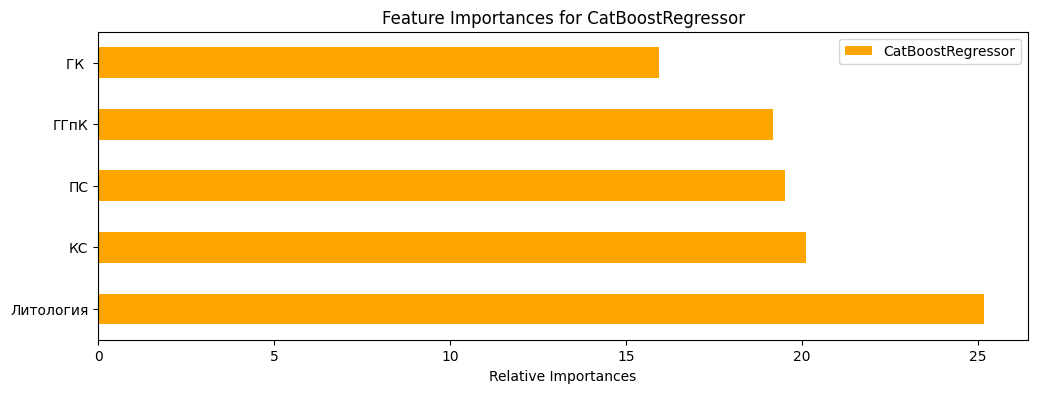

In [ ]:

# best_trained_model = [
#     XGBRegressor(
#         gamma=0.0,
#         learning_rate=0.05994842503189409,
#         max_depth=4,
#         n_estimators=162
#     ),
#     GradientBoostingRegressor(
#         learning_rate=0.12915496650148828,
#         min_samples_split=26,
#         n_estimators=51
#     ),
#     CatBoostRegressor(
#         depth=11,
#         iterations=170,
#         learning_rate=0.12915496650148828
#     )
# ]


best_trained_model = [CatBoostRegressor(silent=True, random_state=0xC0FFEE, **best_params)]

# Fit models
for model in best_trained_model:
    model.fit(X_train, y_train)

# Plotting function
colors = ['orange', 'black', 'green']
for i, model in enumerate(best_trained_model):
    plt.figure(figsize=(12, 4))
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(X_train.shape[1]).plot(
        kind='barh',
        color=colors[i],
        label=type(model).__name__
    )
    plt.xlabel('Relative Importances')
    plt.title(f'Feature Importances for {type(model).__name__}')
    plt.legend()
    plt.show()

## Best model

In [ ]:
path_to_ser = Path('/content/Best_model_prediction_dataset_new.xlsx')

data_initial = pd.read_excel(path_to_ser, sheet_name=f'to use_{target}', skiprows=0)
result_new = data_initial.copy()
result_new  = result_new.rename(columns={"НТПК (фильтр)": "Target"})

In [ ]:
result_new

Глубина Литология  Sample ID    Target      ГК       ГГпК       ПС  \
0     12.800    Гнейсы        NaN       NaN  17.2700  37.18000  3.60660   
1     12.900    Гнейсы        NaN       NaN  16.5500  37.31333  3.62580   
2     13.000    Гнейсы        NaN       NaN  17.7600  36.76500  3.73740   
3     13.300    Гнейсы        NaN       NaN  20.7700  37.88667  3.73620   
4     13.400    Гнейсы        NaN       NaN  21.5800  37.17333  3.84410   
..       ...       ...        ...       ...      ...       ...      ...   
831  164.029    Гнейсы        5.0  2.216061  20.6089  33.46193  3.78403   
832  164.303    Гнейсы        4.0  2.241732  21.7323  31.65353  3.36481   
833  164.586    Гнейсы        3.0  2.245220  22.8926  29.78573  2.93182   
834  164.721    Гнейсы        2.0  2.280669  23.4461  28.89473  2.72527   
835  164.892    Гнейсы        1.0  2.365272  24.1472  27.76613  2.46364   

            КС  
0     474.6100  
1     416.4000  
2     452.7400  
3     511.1200  
4     443.1000  
..         ...  
831  3108.1439  
832  3557.2573  
833  4021.1226  
834  4242.4011  
835  4522.6872  

[836 rows x 8 columns]

In [ ]:
# result_new_full = pd.DataFrame()
# new_dataframe = result_new_full

# new_depths = np.arange(12.8, 164.101, 0.001)

# interpolation(result_new['Глубина'], result_new['ГК '], new_dataframe, new_depths) # ГК
# interpolation(result_new['Глубина'], result_new['ГГпК'], new_dataframe, new_depths) # ГГпК
# interpolation(result_new['Глубина'], result_new['ПС'], new_dataframe, new_depths) # ПС
# interpolation(result_new['Глубина'], result_new['КС'], new_dataframe, new_depths) # КС

# # interpolated_df_full.drop(['Depth_TC'], axis=1, inplace=True)
# # interpolated_df_full.rename(columns={'TC filt tri': 'Target'}, inplace=True)
# result_new_full

In [ ]:
# path_to_ser = Path(output_file)
# data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
# data_lithology = data_initial_lithology.copy()

In [ ]:
# lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
# interpolated_result_new_full_lith = pd.merge(
#     lit_func(lithology, result_new_full),
#     result_new_full ,
#     on='Глубина',
#     how='inner'
# )

In [ ]:
# interpolated_result_new_full_lith.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

In [ ]:
dataset = merged_table_new[['Depth', 'Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]
X = dataset[['Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]

In [131]:
X_full = well_logs_merged[['Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]

In [132]:
X_full

Porosity_NK  Lithology     GK       PS      GGK      DTP
200      0.088783        112  8.170  109.179  2.46955  262.557
201      0.059371        112  8.390  109.612  2.46957  267.121
202      0.052543        112  7.900  109.652  2.46958  271.685
203      0.048011        112  7.410  109.113  2.46960  272.826
204      0.055554        112  7.200  107.709  2.46961  273.967
...           ...        ...    ...      ...      ...      ...
4176     0.126006        100  1.263   91.565  2.57600  169.270
4177     0.134193        100  1.053   91.606  2.62800  169.770
4178     0.137494        100  0.871   91.800  2.66300  170.270
4179     0.137623        100  0.773   91.649  2.64600  170.055
4180     0.133064        100  0.689   90.695  2.59700  169.840

[3981 rows x 6 columns]

In [133]:
X_train.nunique(), X_full.nunique()

(Porosity_NK    44
 Lithology       8
 GK             44
 PS             44
 GGK            39
 DTP            44
 dtype: int64,
 Porosity_NK    3969
 Lithology        15
 GK             1914
 PS             3597
 GGK            1282
 DTP            3891
 dtype: int64)

In [134]:
categorical_clmn = X_full.select_dtypes(include='int64').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X_full[col] = LabelEncoder().fit_transform(X_full[col])

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Porosity_NK','GK', 'PS', 'GGK', 'DTP']
X_full[numerical_columns] = scaler.fit_transform(X_full[numerical_columns])
print(X_full)

      Porosity_NK  Lithology        GK        PS       GGK       DTP
200      0.211347         13  0.177830  0.906362  0.809119  0.546131
201      0.141330         13  0.182767  0.911499  0.809137  0.557892
202      0.125076         13  0.171772  0.911974  0.809146  0.569652
203      0.114290         13  0.160776  0.905579  0.809164  0.572593
204      0.132246         13  0.156064  0.888921  0.809173  0.575533
...           ...        ...       ...       ...       ...       ...
4176     0.299955         10  0.022843  0.697373  0.904762  0.305744
4177     0.319442         10  0.018131  0.697860  0.951482  0.307032
4178     0.327302         10  0.014047  0.700161  0.982929  0.308321
4179     0.327609         10  0.011848  0.698370  0.967655  0.307767
4180     0.316757         10  0.009963  0.687051  0.923630  0.307213

[3981 rows x 6 columns]


In [137]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_train, y_train, X_test, y_test are defined elsewhere

# Define the best parameters
# best_params = study.best_trial.params

# Define the best parameters manually
best_params = {
    'learning_rate': 0.1,
    'iterations': 1000,
    'depth':10
}


# Create the best model with the optimal parameters found by Optuna
best_model = CatBoostRegressor(silent=True, random_state=0xC0FFEE, **best_params)
best_model.fit(X_train, y_train)  # Fit on the entire dataset

# Prediction on training and testing data
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_full = best_model.predict(X_full)

# Print training metrics
print('Train MSE:', round(mean_squared_error(y_train, y_pred_train), 2))
print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

# Print testing metrics
print('Test MSE:', round(mean_squared_error(y_test, y_pred_test), 2))
print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
print('Test MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

Train MSE: 0.0
Train R^2: 1.0
Train MAE: 0.0
Test MSE: 0.09
Test R^2: 0.44
Test MAE: 0.26


### Make DataFrame with the predicted TC, litology and depth


In [162]:
len(y_pred_full)

3981

In [156]:
target='TC parall'

In [ ]:
dataset = merged_table_new[['Depth', 'Target', 'TC_perp_sat', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]
X = dataset[['Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']]

In [163]:
dataset_predicted = pd.DataFrame()

In [170]:
well_logs_merged

Depth  Porosity_NK  Lithology     GK       PS      GGK      DTP
200   2170.0     0.088783        112  8.170  109.179  2.46955  262.557
201   2170.1     0.059371        112  8.390  109.612  2.46957  267.121
202   2170.2     0.052543        112  7.900  109.652  2.46958  271.685
203   2170.3     0.048011        112  7.410  109.113  2.46960  272.826
204   2170.4     0.055554        112  7.200  107.709  2.46961  273.967
...      ...          ...        ...    ...      ...      ...      ...
4176  2567.6     0.126006        100  1.263   91.565  2.57600  169.270
4177  2567.7     0.134193        100  1.053   91.606  2.62800  169.770
4178  2567.8     0.137494        100  0.871   91.800  2.66300  170.270
4179  2567.9     0.137623        100  0.773   91.649  2.64600  170.055
4180  2568.0     0.133064        100  0.689   90.695  2.59700  169.840

[3981 rows x 7 columns]

In [175]:
dataset_predicted = pd.DataFrame()

# dataset_predicted[['Глубина', 'Литология', 'НТПК']] =  data_set[['Глубина', 'Литология', 'НТПК']]
# dataset_predicted[['Литология', 'TC']] =  data_set[['Глубина', 'Литология', 'TC']]

dataset_predicted[['Depth', 'Porosity_NK',
       'Lithology', 'GK', 'PS', 'GGK', 'DTP']] =  well_logs_merged[['Depth','Porosity_NK','Lithology', 'GK', 'PS', 'GGK', 'DTP']]
dataset_predicted[f'Target'] = y_pred_full
# dataset_predicted['Глубина'] = result_new['Глубина']
# dataset_predicted['Diff, %'] = ((dataset_predicted[f'Target'] - dataset_predicted[f'Predicted {target}'])/dataset_predicted[f'{target}'])*100

dataset_predicted

Depth  Porosity_NK  Lithology     GK       PS      GGK      DTP  \
200   2170.0     0.088783        112  8.170  109.179  2.46955  262.557   
201   2170.1     0.059371        112  8.390  109.612  2.46957  267.121   
202   2170.2     0.052543        112  7.900  109.652  2.46958  271.685   
203   2170.3     0.048011        112  7.410  109.113  2.46960  272.826   
204   2170.4     0.055554        112  7.200  107.709  2.46961  273.967   
...      ...          ...        ...    ...      ...      ...      ...   
4176  2567.6     0.126006        100  1.263   91.565  2.57600  169.270   
4177  2567.7     0.134193        100  1.053   91.606  2.62800  169.770   
4178  2567.8     0.137494        100  0.871   91.800  2.66300  170.270   
4179  2567.9     0.137623        100  0.773   91.649  2.64600  170.055   
4180  2568.0     0.133064        100  0.689   90.695  2.59700  169.840   

        Target  
200   3.373262  
201   3.356614  
202   3.357210  
203   3.364284  
204   3.357714  
...        ...  
4176  3.506557  
4177  3.465835  
4178  3.463135  
4179  3.474791  
4180  3.477609  

[3981 rows x 8 columns]

In [ ]:
dataset_predicted.to_excel(f'final_prediction_{target}.xlsx', index=False)

### Visualization

Pearson correlation coefficient (R): 0.635


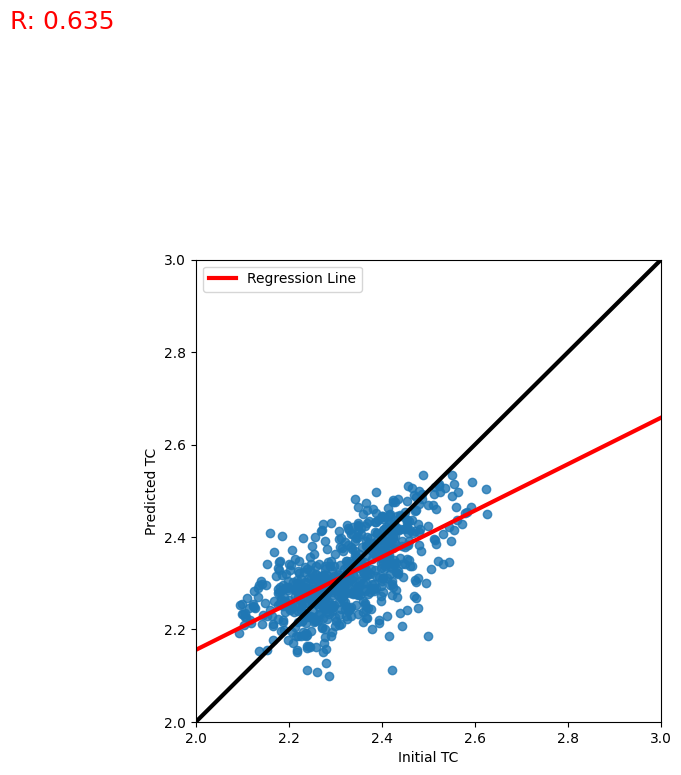

In [ ]:
from scipy.stats import pearsonr

dataset_predicted_shorted = dataset_predicted.dropna() # короткий формат - по количеству измеренных точек

x1 = dataset_predicted_shorted[f'{target}'].astype(float)
x2 = dataset_predicted_shorted[f'Predicted {target}'].astype(float)


fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x1, x2, alpha=0.8)
# ax.set_xlim(1.5, 4.5)
# ax.set_ylim(1.5, 4.5)

ax.set_xlim(2, 3)
ax.set_ylim(2, 3)

# Fit a linear regression line
coefficients = np.polyfit(x1, x2, 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(1.5, 6, 100)
y_line = polynomial(x_axis)
ax.plot(x_axis, y_line, color='red', label='Regression Line', lw=3)
ax.plot([1, 5], [1, 5], color='black', lw=3)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(x1, x2)
print(f'Pearson correlation coefficient (R): {corr:.3f}')

# Add correlation coefficient to the plot
ax.text(1.6, 3.5, f'R: {corr:.3f}', fontsize=18, color='red')

ax.set_xlabel('Initial TC')
ax.set_ylabel('Predicted TC')
ax.legend()

plt.show()

Pearson correlation coefficient (R): 0.635


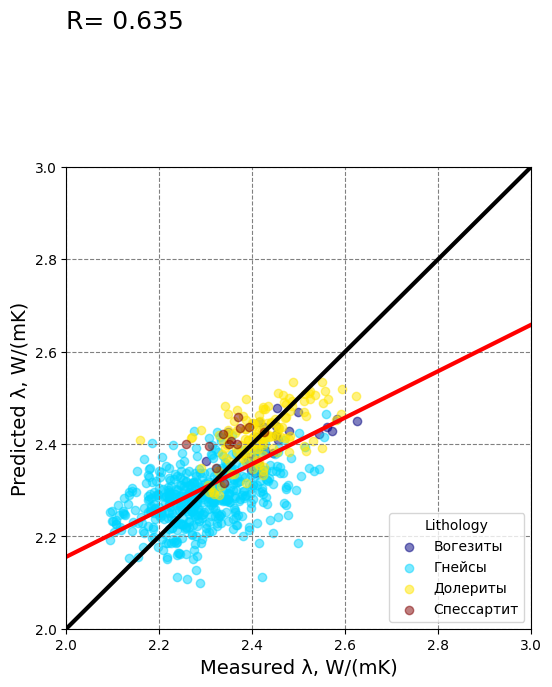

In [ ]:
y_initial = dataset_predicted_shorted[f'{target}'].astype(float)
y_pred = dataset_predicted_shorted[f'Predicted {target}'].astype(float)
lithology = dataset_predicted_shorted['Литология']

# Apply Label Encoding to lithology
le = LabelEncoder()
lithology_encoded = le.fit_transform(lithology)
unique_lithology = le.classes_

# Create a color map with a jet colormap
colors = plt.cm.jet(np.linspace(0, 1, len(unique_lithology)))
color_map = dict(zip(unique_lithology, colors))

fig, ax = plt.subplots(figsize=(6,6))

# Plot each lithology type with a different color
for lith in unique_lithology:
    mask = lithology == lith
    ax.scatter(y_initial[mask], y_pred[mask], alpha=0.5, color=color_map[lith],
               label=lith)

# Fit a linear regression line
coefficients = np.polyfit(y_initial, y_pred, 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(1.5, 4.5, 100)
y_line = polynomial(x_axis)
ax.plot(x_axis, y_line, color='red', lw=3)
ax.plot([1, 5], [1, 5], color='black', lw=3)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(y_initial, y_pred)
print(f'Pearson correlation coefficient (R): {corr:.3f}')

# Add correlation coefficient to the plot
ax.text(2, 3.3, f'R= {corr:.3f}', fontsize=18, color='black')

ax.set_xlabel('Measured λ, W/(mK)', fontsize=14)
ax.set_ylabel('Predicted λ, W/(mK)', fontsize=14)
# ax.set_xlim(1.5, 4.5)
# ax.set_ylim(1.5, 4.5)

ax.set_xlim(2, 3)
ax.set_ylim(2, 3)
ax.grid(color='gray', linestyle='--')
ax.legend(title='Lithology', loc='lower right')

plt.show()

In [ ]:
dataset_predicted_shorted

Литология       VHC  Predicted VHC  Глубина    Diff, %
134  Долериты  2.158559       2.408730   30.606 -11.589715
181    Гнейсы  2.135051       2.154009   36.348  -0.887930
183    Гнейсы  2.093156       2.192608   36.558  -4.751315
184    Гнейсы  2.098957       2.254252   36.758  -7.398719
185    Гнейсы  2.121627       2.250229   36.895  -6.061452
..        ...       ...            ...      ...        ...
831    Гнейсы  2.216061       2.294503  164.029  -3.539736
832    Гнейсы  2.241732       2.257170  164.303  -0.688642
833    Гнейсы  2.245220       2.265644  164.586  -0.909681
834    Гнейсы  2.280669       2.221610  164.721   2.589531
835    Гнейсы  2.365272       2.241047  164.892   5.252064

[655 rows x 5 columns]

In [184]:
thermal_logs

Sample ID   Depth   Target  TC_perp_sat
0        509  2319.8  2.51840     2.287343
1        531  2322.6  2.49030     2.214457
2        537  2323.2  2.48200     2.117215
3        545  2324.0  3.37875     2.564754
4        549  2324.6  2.58210     2.361715
..       ...     ...      ...          ...
71       0_7  2506.0  3.36280     3.265832
72       474  2506.7  2.90850     2.196931
73       480  2507.4  3.36100     2.993490
74       490  2508.5  3.11720     2.624205
75       506  2510.1  2.57200     1.586353

[76 rows x 4 columns]

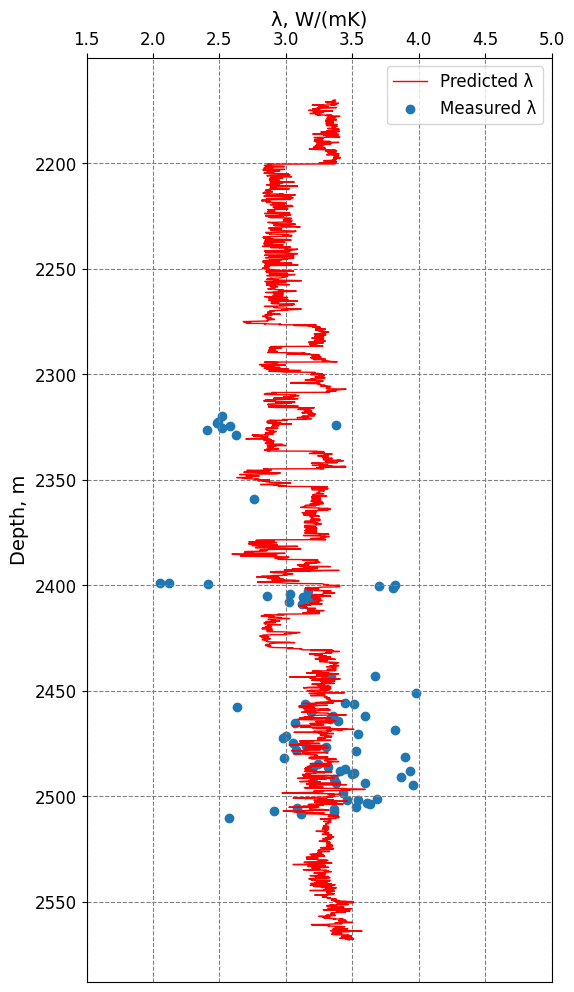

In [187]:
fig, ax1 = plt.subplots(figsize=(6, 12))

# # Measured TC
# x1 =  dataset_predicted_shorted[f'{target}'].astype(float)
# y1 = dataset_predicted_shorted['Глубина']
# # ax1.plot(x1, y1, marker='o', markersize=1, lw=1, label='Measured λ')
# ax1.plot(x1, y1, marker='o', markersize=1, lw=0, label='Measured λ')

# Predicted TC
x2 = dataset_predicted[f'Target'].astype(float)
y2 = dataset_predicted['Depth']
ax1.plot(x2, y2, 'r-', label='Predicted λ', lw=1)

x3 = thermal_logs['Target']
y3 = thermal_logs['Depth']
ax1.scatter(x3, y3, label='Measured λ', lw=1)

# Set labels and grid
ax1.set_ylabel('Depth, m', fontsize=14)
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('λ, W/(mK)', fontsize=14)
ax1.grid(color='gray', linestyle='--')

# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
# ax1.set_ylim(10, 167)
# ax1.set_yticks(np.arange(10, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

# Set legend with increased font size
ax1.legend(fontsize=12)

plt.show()

In [ ]:
lithology_array = []
hatch_array = []
color_array = []

data = dataset_predicted.sort_values('Глубина')
data ['Diff, %'] = data['Diff, %'].fillna(0)
data = data[["Глубина", f'Predicted {target}', 'Литология', 'Diff, %']]

work_layers_initial = data

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Литология']
    # layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

Глубина  Predicted VHC Литология   Diff, %  Lithology Index    Color
0     12.800       2.176610    Гнейсы  0.000000          0        #bebebe
1     12.900       2.184837    Гнейсы  0.000000          0        #bebebe
2     13.000       2.201936    Гнейсы  0.000000          0        #bebebe
3     13.300       2.185641    Гнейсы  0.000000          0        #bebebe
4     13.400       2.184764    Гнейсы  0.000000          0        #bebebe
..       ...            ...       ...       ...        ...   ...      ...
831  164.029       2.294503    Гнейсы -3.539736          0        #bebebe
832  164.303       2.257170    Гнейсы -0.688642          0        #bebebe
833  164.586       2.265644    Гнейсы -0.909681          0        #bebebe
834  164.721       2.221610    Гнейсы  2.589531          0        #bebebe
835  164.892       2.241047    Гнейсы  5.252064          0        #bebebe

[836 rows x 7 columns]

In [ ]:
work_layers_initial['Литология'].info()

<class 'pandas.core.series.Series'>
Index: 836 entries, 0 to 835
Series name: Литология
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index        lith  lith_num hatch    color
0      0      Гнейсы         0        #bebebe
1      1    Вогезиты         1        #B89230
2      2    Долериты         2        #C0FDB6
3      3  Спессартит         3        #CCCC42

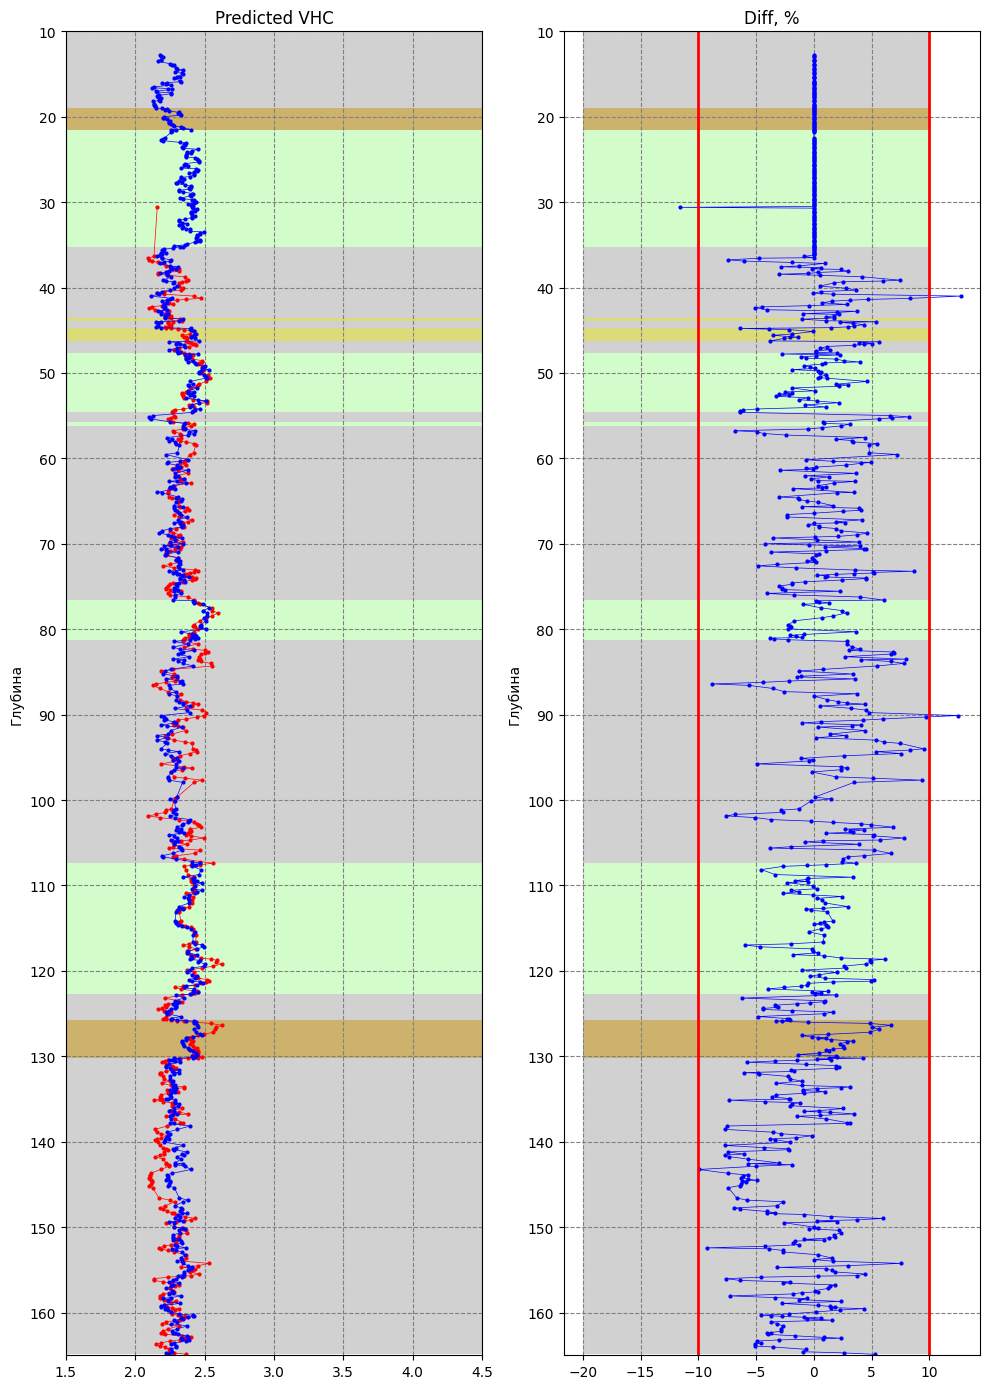

In [ ]:
def initial_plot(ax, x, y, label_name, lithology_data, data):

    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    # ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        if x.name == f'Predicted {target}':
          ax.fill_betweenx(depth_values,
                       1,6,
                       facecolor=color, hatch=hatch, alpha=0.7)



        ax.fill_betweenx(depth_values,
                       (min(x) // 10) * 10, (np.round(max(x)+1, -1) // 10) * 10,
                       facecolor=color, hatch=hatch, alpha=0.7)


data = work_layers_initial.sort_values('Глубина')
data = data[["Глубина", f'Predicted {target}', 'Литология', 'Diff, %']]
parametrs = [f'Predicted {target}', 'Diff, %']

# Mesured TC
data_additional = dataset_predicted_shorted[[f'{target}', 'Глубина']]
x1 =  data_additional [f'{target}'].astype(float)
y1 = data_additional['Глубина']


rows = 1
cols = len(parametrs)
fig, axs = plt.subplots(rows, cols, figsize=(10, 14))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parametrs):
    ax = axs[index]
    if name_log == f'Predicted {target}':
        ax.plot(x1, y1, 'r-', marker='o', markersize=2, lw=0.5)
        ax.set_xlim(1.5, 4.5)

    # Set y-axis properties
    ax.set_ylabel("Глубина")
    ax.set_ylim(10, 165)
    ax.set_yticks(np.arange(10, 165, 10))
    ax.grid(color='gray', linestyle='--')

    # Call initial_plot function
    initial_plot(ax, data[name_log].astype(float), data['Глубина'].astype(float),
                 name_log, data['Литология'], work_layers_initial.sort_values('Глубина'))

    # Add red borders along the x-axis from -10 to 10
    ax.axvline(-10, color='red', linewidth=2)  # Draw vertical line at x = -10
    ax.axvline(10, color='red', linewidth=2)   # Draw vertical line at x = 10

plt.tight_layout()
plt.show()

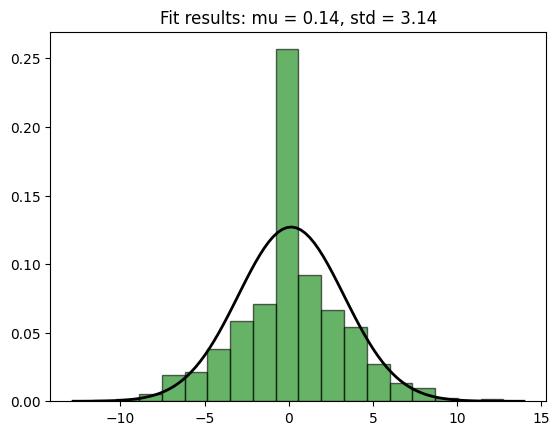

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd


data = work_layers_initial['Diff, %']

# Create the histogram of the data
count, bins, ignored = plt.hist(data, bins=18, density=True,
                                alpha=0.6, color='g', edgecolor='black')

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# # Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Set the title with the fit results
title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)

plt.show()